# Matrix Decomposition

This block introduces fundamental applications of **Singular Value Decomposition (SVD)** in numerical methods and data analysis.  
Across three problems, we explore matrix reconstruction, image compression, and dimensionality reduction on real datasets.

---

## Problem 0: Random Matrix Reconstruction
**Objective:**  
Generate a random matrix, perform SVD, reconstruct the matrix from its decomposition, and calculate the reconstruction error.

**Key Points:**  
- Demonstrates the mechanics of SVD factorization: $$X = U \Sigma V^H$$.  
- Reconstruction should match the original matrix up to floating-point precision.  
- Error values highlight numerical limitations rather than algorithmic flaws.

---

## Problem 1: Image Compression with SVD
**Objective:**  
Apply SVD to compress images by reconstructing them with a limited number of singular values. Compare grayscale and color reconstructions, and evaluate storage reduction.

**Tasks:**  
- Use the *rocket* image from `scikit-image`.  
- Perform grayscale SVD and reconstruct with varying \(k\) values.  
- Calculate compression ratio vs raw pixel storage.  
- Extend to color images (per-channel SVD).  
- Compare results with the *chelsea* image to assess which requires more singular values for tolerable quality.

**Key Points:**  
- Fewer singular values → higher compression but lower quality.  
- Grayscale images compress more easily than color.  
- Image complexity (textures, edges) determines how many singular values are needed.

---

## Problem 2: Digits Dataset and SVD
**Objective:**  
Perform SVD on the digits dataset, inspect singular values, and reconstruct samples using a limited number of singular vectors. Compare reconstruction quality for the full dataset and for a subset of a specific digit.

**Tasks:**  
- Load the digits dataset from `sklearn.datasets`.  
- Perform SVD on the flattened dataset.  
- Reconstruct samples with varying \(k\) values and visualize quality.  
- Repeat for a subset of images corresponding to a single digit (e.g., "0").  
- Compare how many singular values are needed for similar reconstruction quality across digits.

**Key Points:**  
- Singular values indicate the importance of each component in representing the dataset.  
- Digits with simpler shapes (like "0") may require fewer singular values than complex ones (like "8").  
- Highlights the role of SVD in dimensionality reduction and data compression.

---

### Block Summary
The **Matrix Decomposition block** establishes SVD as a versatile tool for:
- **Matrix reconstruction** (Problem 0)  
- **Image compression and storage reduction** (Problem 1)  
- **Dimensionality reduction in datasets** (Problem 2)  

These problems build intuition for how SVD underpins many machine learning and signal processing techniques, bridging linear algebra with practical applications.


## Problem 0: Matrix Decomposition with SVD

**Objective:**  
Generate a random matrix, perform Singular Value Decomposition (SVD), reconstruct the matrix from its decomposition, and calculate the reconstruction error.

**Steps:**  
1. Create a random \(4 times 6\) matrix.  
2. Apply SVD to decompose it into \(U\), \(s\), and \(V^H).  
3. Reconstruct the matrix using the SVD components.  
4. Compute the maximum absolute error between the original and reconstructed matrix.  

**Interpretive Notes:**  
- SVD factorizes a matrix \(X\) into orthogonal matrices \(U\) and \(V^H\), and singular values \(s\).  
- Reconstruction should be exact (up to numerical precision).  
- The error value demonstrates floating-point limitations rather than algorithmic inaccuracy.


In [ ]:
# Problem 0: Matrix Decomposition with SVD
import numpy as np
import scipy.linalg as la

# Step 1: Generate a random 4x6 matrix
X = np.random.random((4, 6))
print("Original Matrix X:\n", X)

[[0.56436545 0.75061719 0.90570067 0.22914286 0.48478366 0.48322069]
 [0.90670003 0.13256843 0.90229762 0.36311071 0.35956859 0.65535736]
 [0.09983532 0.08409863 0.67757743 0.91417614 0.27257392 0.75934158]
 [0.03007795 0.85974592 0.20758489 0.31075764 0.22516112 0.0050684 ]]


In [ ]:
# Step 2: Perform SVD decomposition
U, s, Vh = la.svd(X)
print("\nShapes -> U:", U.shape, " s:", s.shape, " Vh:", Vh.shape)

(4, 4) (4,) (6, 6)


In [ ]:
# Step 3: Reconstruct the matrix from SVD components
# Convert singular values into a diagonal matrix
S = np.zeros((U.shape[0], Vh.shape[0]))
S[:len(s), :len(s)] = np.diag(s)

Y = U @ S @ Vh
print("\nReconstructed Matrix Y:\n", Y)

# Step 4: Calculate reconstruction error
error = np.max(np.abs(Y - X))
print("\nMaximum reconstruction error:", error)

7.771561172376096e-16


## Problem 1: Image Compression with SVD

**Objective:**  
Use Singular Value Decomposition (SVD) to compress images by reconstructing them with a limited number of singular values. Compare grayscale and color reconstructions, and evaluate storage reduction.

**Steps:**  
1. Load the *rocket* image from `scikit-image`.  
2. Convert to grayscale and perform SVD decomposition.  
3. Reconstruct the image using the first \(k\) singular values, and visualize results.  
4. Calculate storage reduction compared to raw pixel data.  
5. Repeat the process for the color image (per-channel SVD).  
6. Compare results with another image (*chelsea*) to see which requires more data for tolerable quality.

**Interpretive Notes:**  
- SVD allows dimensionality reduction by keeping only the largest singular values.  
- Fewer singular values → higher compression but lower image quality.  
- Grayscale images typically compress more easily than color images.  
- Different images may require different \(k\) values for “tolerable” reconstruction depending on complexity and texture.

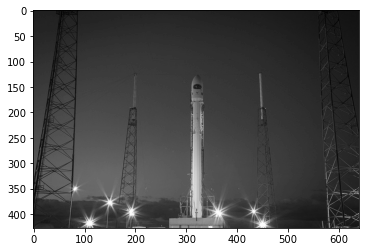

In [ ]:
import numpy as np
import scipy.linalg as la
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Step 1: Load rocket image
img = data.rocket()
gr_img = rgb2gray(img)

plt.imshow(gr_img, cmap='gray')
plt.title("Original Grayscale Rocket Image")
plt.axis("off")
plt.show()

In [ ]:
# Step 2: Perform SVD decomposition
U, s, Vh = la.svd(gr_img, full_matrices=False)
print("Shapes -> U:", U.shape, " s:", s.shape, " Vh:", Vh.shape)

(427, 427) (427,) (427, 640)


1


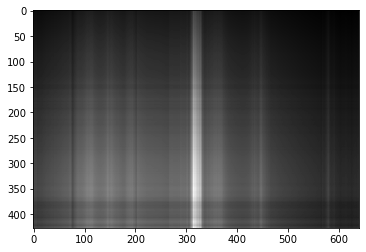

2


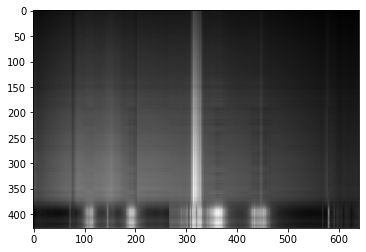

3


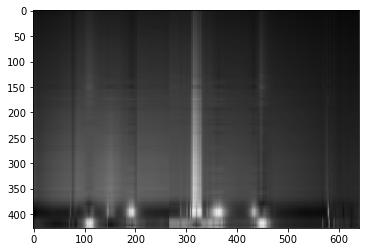

4


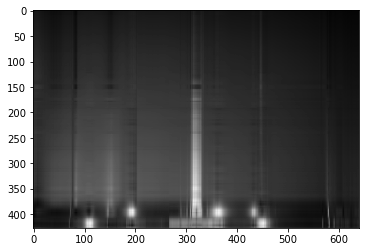

5


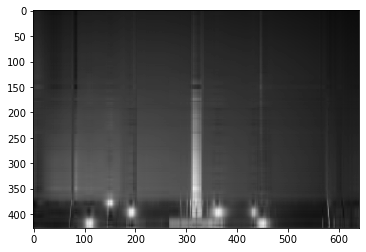

6


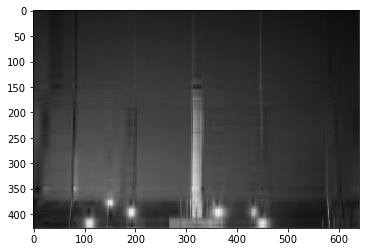

7


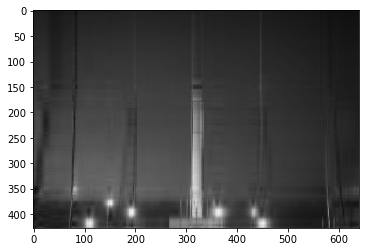

8


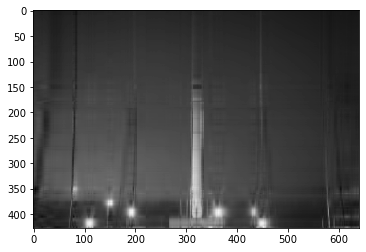

9


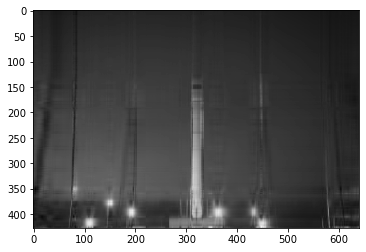

10


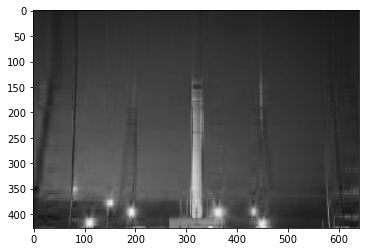

11


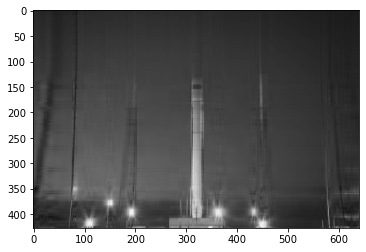

12


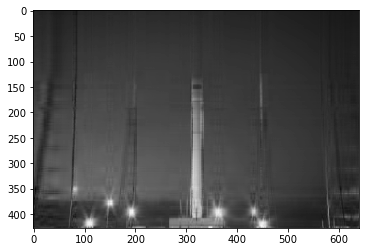

13


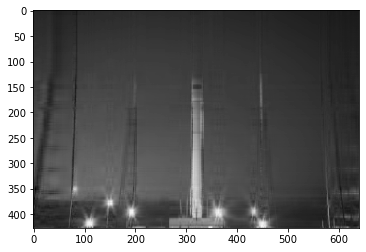

14


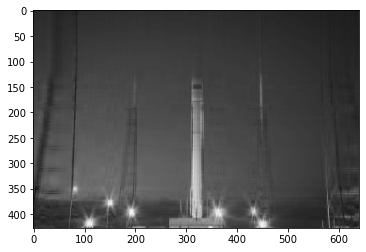

15


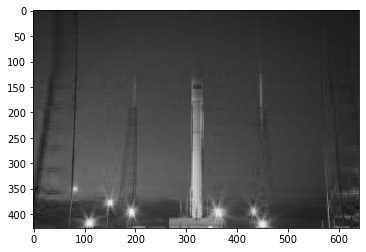

16


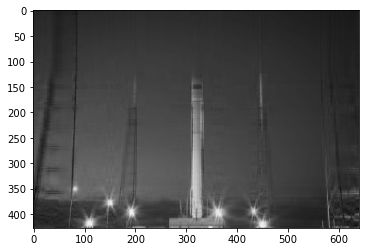

17


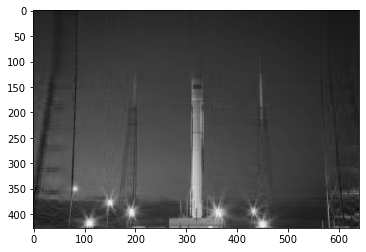

18


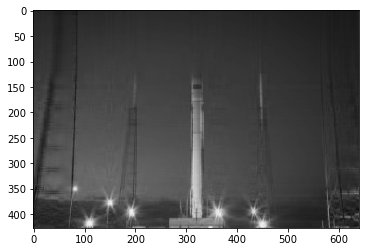

19


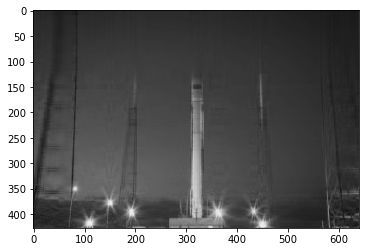

In [ ]:
# Step 3: Reconstruct with first k singular values
for k in [1, 5, 10, 20, 50, 100]:
    s_new = np.zeros_like(s)
    s_new[:k] = s[:k]
    img_restored = U @ np.diag(s_new) @ Vh

    plt.imshow(img_restored, cmap='gray')
    plt.title(f"Reconstruction with k={k} singular values")
    plt.axis("off")
    plt.show()

In [ ]:
# Step 4: Storage comparison
raw_storage = gr_img.size
compressed_storage = (U.shape[0] + Vh.shape[1] + 1) * 20  # for k=20
print("Raw data size:", raw_storage)
print("Compressed size (k=20):", compressed_storage)
print("Compression ratio:", compressed_storage / raw_storage)

Raw data:  273280
20 singular values:  85440


(427, 640, 3)


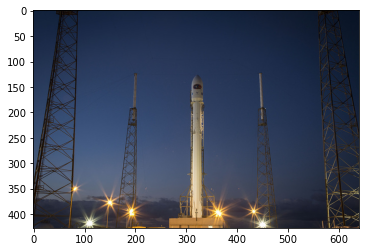

In [ ]:
# Step 5: Color image compression (same k for all channels)
img_norm = img / 255.0  # normalize pixel values
for k in [5, 20, 50]:
    img_restored = np.zeros_like(img_norm)
    for ch in range(3):  # RGB channels
        U, s, Vh = la.svd(img_norm[:, :, ch], full_matrices=False)
        s_new = np.zeros_like(s)
        s_new[:k] = s[:k]
        img_restored[:, :, ch] = U @ np.diag(s_new) @ Vh

    plt.imshow(img_restored)
    plt.title(f"Color reconstruction with k={k} per channel")
    plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


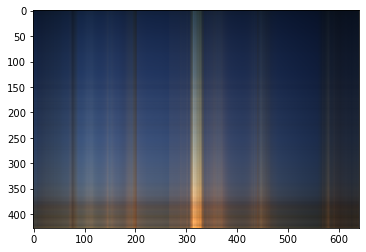

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


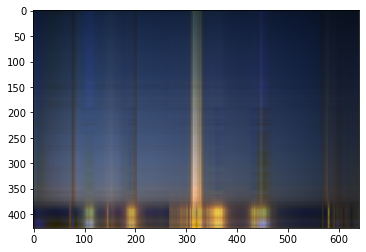

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


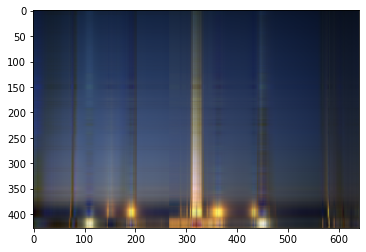

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


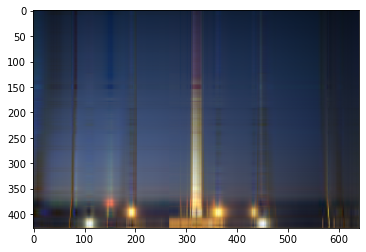

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


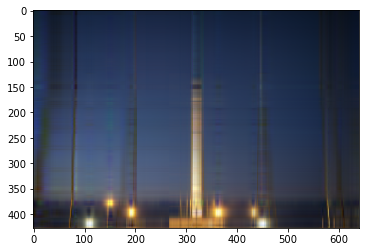

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


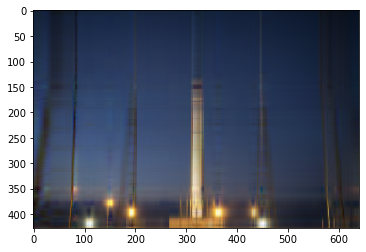

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


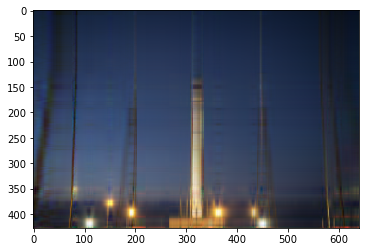

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


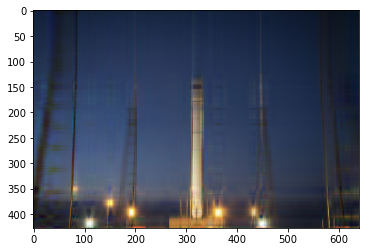

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


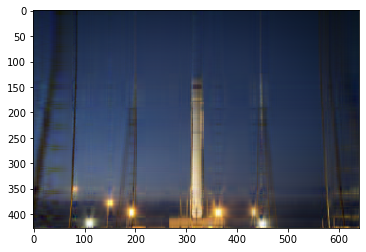

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10


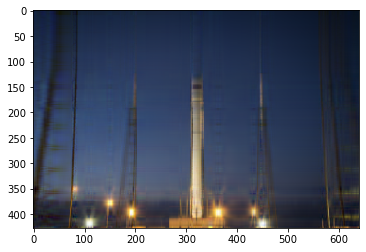

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11


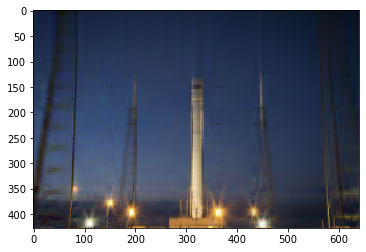

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12


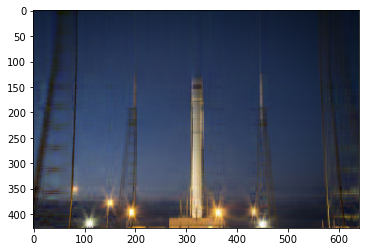

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13


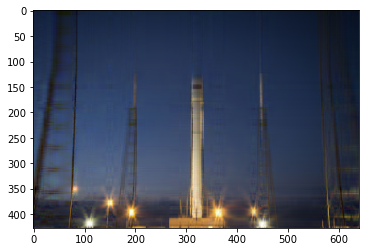

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14


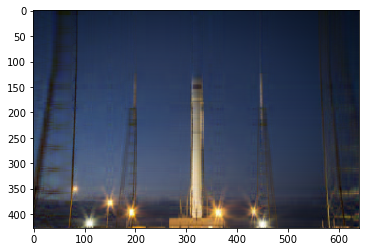

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15


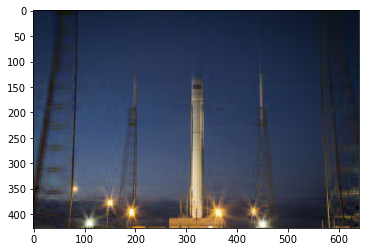

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16


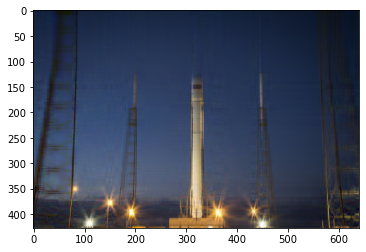

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17


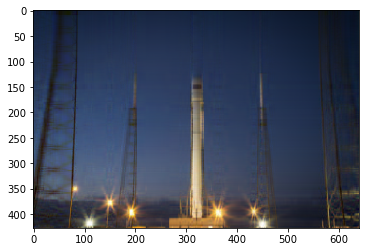

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18


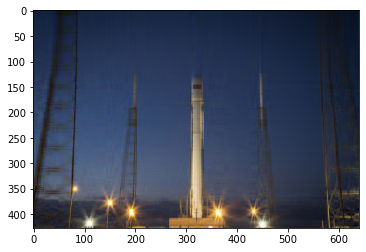

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19


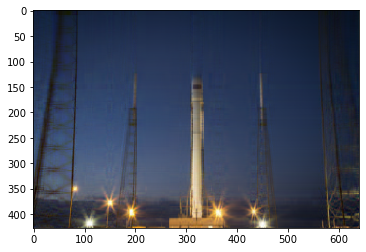

In [ ]:
# Step 6: Compare with Chelsea image
chelsea = data.chelsea() / 255.0
plt.imshow(chelsea)
plt.title("Original Chelsea Image")
plt.axis("off")
plt.show()

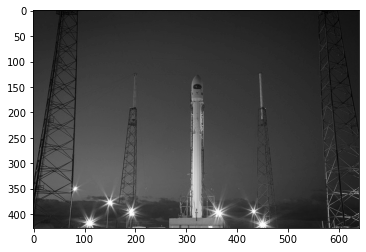

In [ ]:
for k in [5, 20, 50]:
    chelsea_restored = np.zeros_like(chelsea)
    for ch in range(3):
        U, s, Vh = la.svd(chelsea[:, :, ch], full_matrices=False)
        s_new = np.zeros_like(s)
        s_new[:k] = s[:k]
        chelsea_restored[:, :, ch] = U @ np.diag(s_new) @ Vh

    plt.imshow(chelsea_restored)
    plt.title(f"Chelsea reconstruction with k={k} per channel")
    plt.axis("off")
    plt.show()

## Problem 2: SVD on Digits Dataset

**Objective:**  
Apply Singular Value Decomposition (SVD) to the digits dataset, inspect singular values, and reconstruct samples using a limited number of singular vectors. Compare reconstruction quality for the full dataset and for a subset of a specific digit.

**Steps:**  
1. Load the digits dataset from `sklearn.datasets`.  
2. Explore dataset structure (data, images, targets).  
3. Perform SVD on the flattened dataset.  
4. Reconstruct samples with varying numbers of singular values and visualize quality.  
5. Repeat the process for a subset of images corresponding to a single digit (e.g., digit "0").  
6. Compare how many singular values are needed for similar reconstruction quality.

**Interpretive Notes:**  
- The singular values indicate the importance of each component in representing the dataset.  
- Fewer singular values → higher compression but lower reconstruction quality.  
- Digits with simpler shapes (like "0") may require fewer singular values than more complex digits (like "8").  

(1797, 64) (1797, 8, 8)
target: 0 |target names: 0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 432x288 with 0 Axes>

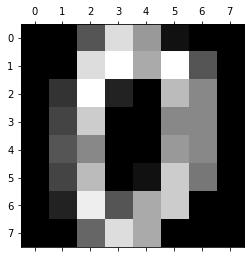

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import scipy.linalg as la

# Step 1: Load digits dataset
digits = load_digits()
print("Data shape:", digits.data.shape)
print("Images shape:", digits.images.shape)
print("Target example:", digits.target[0])

# Step 2: Inspect one sample
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Digit sample (label={digits.target[0]})")
plt.show()

(1797, 64) (64,) (64, 64)
1
(8, 8)


<Figure size 432x288 with 0 Axes>

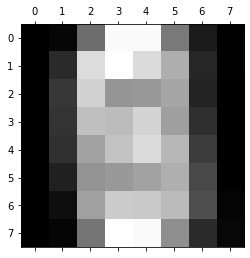

2
(8, 8)


<Figure size 432x288 with 0 Axes>

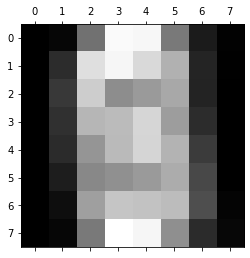

3
(8, 8)


<Figure size 432x288 with 0 Axes>

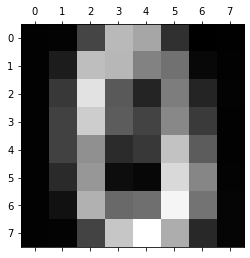

4
(8, 8)


<Figure size 432x288 with 0 Axes>

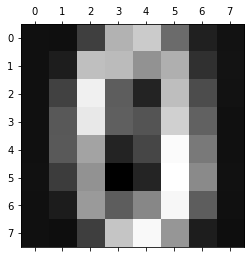

5
(8, 8)


<Figure size 432x288 with 0 Axes>

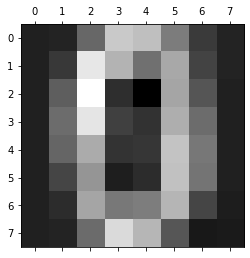

6
(8, 8)


<Figure size 432x288 with 0 Axes>

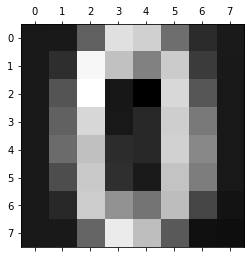

7
(8, 8)


<Figure size 432x288 with 0 Axes>

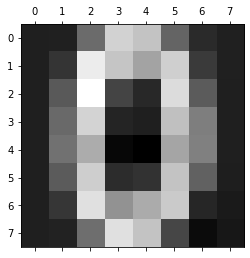

8
(8, 8)


<Figure size 432x288 with 0 Axes>

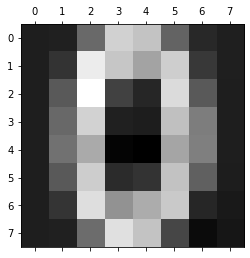

9
(8, 8)


<Figure size 432x288 with 0 Axes>

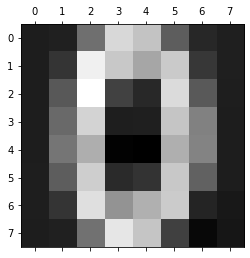

10
(8, 8)


<Figure size 432x288 with 0 Axes>

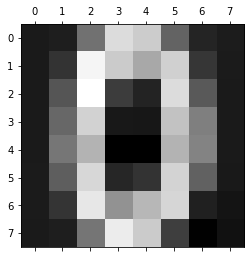

11
(8, 8)


<Figure size 432x288 with 0 Axes>

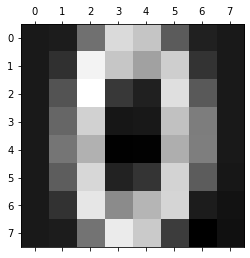

12
(8, 8)


<Figure size 432x288 with 0 Axes>

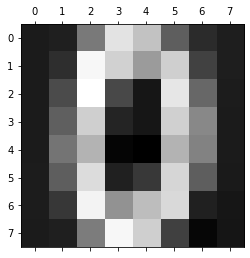

13
(8, 8)


<Figure size 432x288 with 0 Axes>

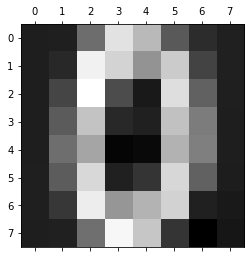

14
(8, 8)


<Figure size 432x288 with 0 Axes>

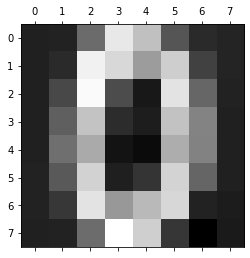

15
(8, 8)


<Figure size 432x288 with 0 Axes>

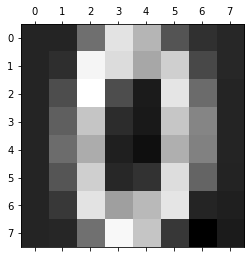

16
(8, 8)


<Figure size 432x288 with 0 Axes>

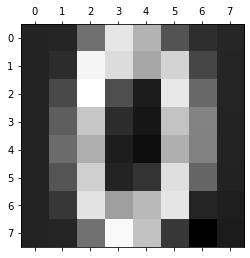

17
(8, 8)


<Figure size 432x288 with 0 Axes>

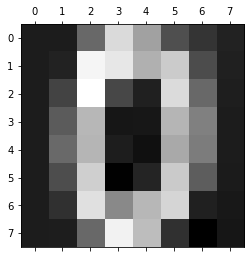

18
(8, 8)


<Figure size 432x288 with 0 Axes>

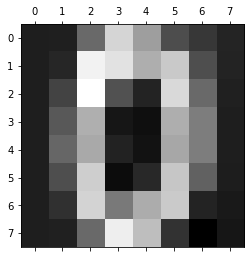

19
(8, 8)


<Figure size 432x288 with 0 Axes>

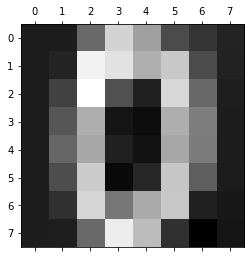

In [ ]:
# Flatten images for SVD (1797 samples, each 64 pixels)
digits_images = digits.images.reshape((1797, 64))
print("Flattened shape:", digits_images.shape)

# Step 3: Perform SVD on the dataset
U, s, Vh = la.svd(digits_images, full_matrices=False)
print("Shapes -> U:", U.shape, " s:", s.shape, " Vh:", Vh.shape)

# Step 4: Reconstruct with first k singular values
for k in [1, 5, 10, 20, 50]:
    s_new = np.zeros_like(s)
    s_new[:k] = s[:k]
    img_restored = U @ np.diag(s_new) @ Vh

    # Show reconstruction of the first digit
    img_restored_sample = img_restored[0].reshape((8, 8))
    plt.matshow(img_restored_sample)
    plt.title(f"Reconstruction with k={k} singular values")
    plt.show()

In [ ]:
# Step 5: Subset for digit "0"
X, y = load_digits(return_X_y=True)
X_zero = X[y == 0]  # keep only digit "0"
print("Subset shape (digit 0):", X_zero.shape)

(178, 64) | [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] | [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


(178, 64) (64,) (64, 64)
1
(8, 8)


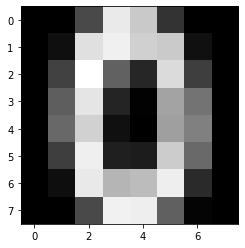

2
(8, 8)


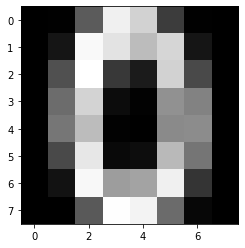

3
(8, 8)


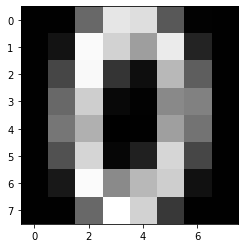

4
(8, 8)


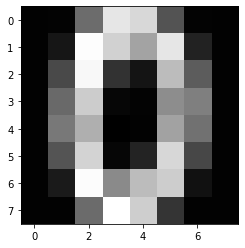

5
(8, 8)


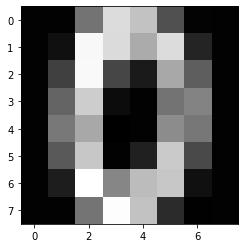

6
(8, 8)


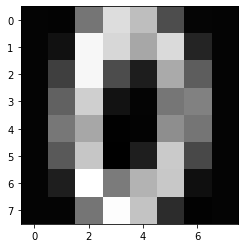

7
(8, 8)


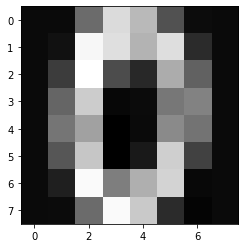

8
(8, 8)


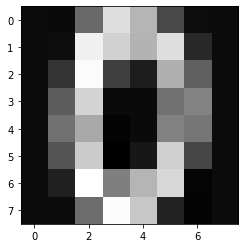

9
(8, 8)


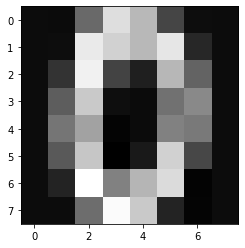

10
(8, 8)


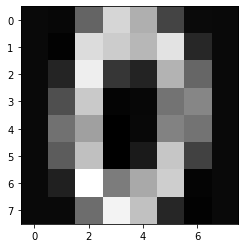

11
(8, 8)


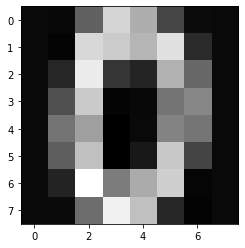

12
(8, 8)


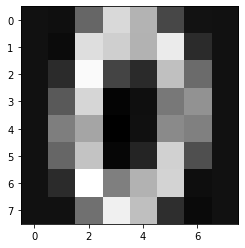

13
(8, 8)


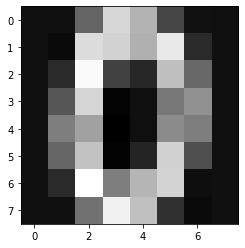

14
(8, 8)


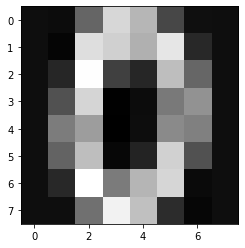

15
(8, 8)


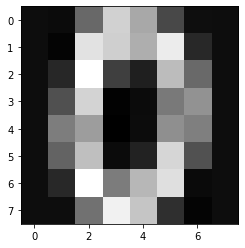

16
(8, 8)


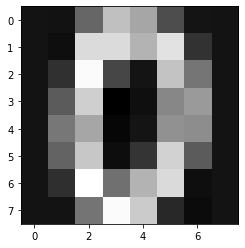

17
(8, 8)


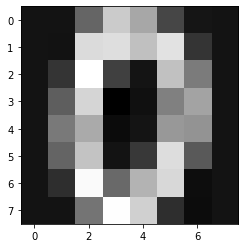

18
(8, 8)


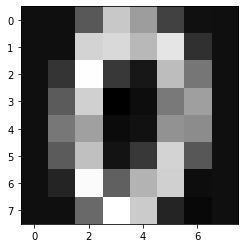

19
(8, 8)


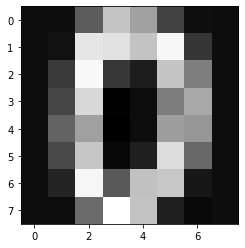

In [ ]:
# Perform SVD on digit "0" subset
U0, s0, Vh0 = la.svd(X_zero, full_matrices=False)
print("Shapes (digit 0) -> U:", U0.shape, " s:", s0.shape, " Vh:", Vh0.shape)

# Step 6: Reconstruct digit "0" samples with varying k
for k in [1, 5, 10, 20]:
    s_new = np.zeros_like(s0)
    s_new[:k] = s0[:k]
    img_restored0 = U0 @ np.diag(s_new) @ Vh0

    # Show reconstruction of the first "0"
    img_restored_sample0 = img_restored0[0].reshape((8, 8))
    plt.imshow(img_restored_sample0, cmap='gray')
    plt.title(f"Digit '0' reconstruction with k={k}")
    plt.axis("off")
    plt.show()

# HW1: PCA and ROC Curve on Wine Dataset

**Objective:**  
Perform Principal Component Analysis (PCA) on the Wine dataset, project the data onto a one-dimensional space, and construct a Receiver Operating Characteristic (ROC) curve for a binary classification task. Implement ROC curve calculation manually.

**Steps:**  
1. Load the Wine dataset from `sklearn.datasets`.  
2. Standardize features for PCA.  
3. Reduce dimensionality to 1D using PCA.  
4. Select one wine class as the positive class (e.g., class 0).  
5. Implement ROC curve calculation manually by thresholding projected values.  
6. Plot the ROC curve and identify the optimal threshold.  

**Interpretive Notes:**  
- PCA reduces dimensionality while preserving variance, but class separability may be reduced.  
- ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 − False Positive Rate).  
- The optimal threshold maximizes the difference between TPR and FPR.  

---

## Comparative Insight: PCA vs. Full Feature Classification

- **Full Feature Space (13 dimensions):**  
  - Classifiers (e.g., logistic regression, SVM) trained on the full dataset can exploit all variance and correlations.  
  - Typically achieve higher accuracy and better separation between wine classes.  
  - Computationally heavier, but modern algorithms handle this scale easily.

- **PCA 1D Projection:**  
  - Reduces the dataset to a single axis of maximum variance.  
  - Useful for visualization and dimensionality reduction.  
  - Classification performance is weaker because only one dimension is used.  
  - ROC curve illustrates that separability exists, but overlap between classes increases misclassification risk.

**Key Takeaway:**  
PCA-based 1D projection is excellent for **exploratory analysis and visualization**, but for **robust classification**, retaining more components (or the full feature set) yields better performance. This exercise highlights the trade-off between **simplicity and accuracy** in dimensionality reduction.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1
  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


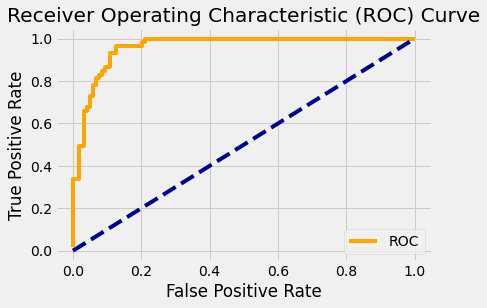

106
Threshold value is: 0.9900791016088573


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_wine()
X = data.data
y = data.target

# Step 2: Standardize features
X_std = StandardScaler().fit_transform(X)

# Step 3: PCA reduction to 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std).ravel()

# Step 4: Define binary classification (class 0 vs others)
y_binary = np.where(y == 0, 1, -1)

# Step 5: Manual ROC curve implementation
def roc_curve_manual(y_true, y_scores, thresholds):
    fpr, tpr = [], []
    for t in thresholds:
        y_pred = np.where(y_scores >= t, 1, -1)
        fp = np.sum((y_pred == 1) & (y_true == -1))
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == -1) & (y_true == 1))
        tn = np.sum((y_pred == -1) & (y_true == -1))
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return np.array(fpr), np.array(tpr)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Wine Dataset, PCA 1D)')
    plt.legend()
    plt.show()

# Step 6: Compute ROC and optimal threshold
thresholds = np.linspace(X_pca.min(), X_pca.max(), 200)
fpr, tpr = roc_curve_manual(y_binary, X_pca, thresholds)
plot_roc_curve(fpr, tpr)

# Find optimal threshold (Youden’s J statistic: maximize TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

# HW2: Linear Discriminant Analysis (LDA) and ROC Curve on Breast Cancer Dataset

**Objective:**  
Implement Linear Discriminant Analysis (LDA) manually for binary classification on the Breast Cancer dataset. Project the data onto a one-dimensional space and construct a Receiver Operating Characteristic (ROC) curve. Implement ROC curve calculation manually.

**Steps:**  
1. Load the Breast Cancer dataset from `sklearn.datasets`.  
2. Standardize features for numerical stability.  
3. Compute class means and overall mean.  
4. Construct within-class scatter matrix (SW) and between-class scatter matrix (SB).  
5. Solve the generalized eigenvalue problem for $$SW^{-1}SB$$.  
6. Select the eigenvector corresponding to the largest eigenvalue as the LDA projection vector.  
7. Project data onto 1D space.  
8. Implement ROC curve manually and identify the optimal threshold.  

**Interpretive Notes:**  
- LDA finds a projection that maximizes class separability by maximizing between-class variance while minimizing within-class variance.  
- ROC curve illustrates classification performance across thresholds.  
- The optimal threshold balances sensitivity and specificity (Youden’s J statistic).  

---

## Comparative Insight: LDA vs PCA for Binary Classification

- **PCA (HW1):**  
  - Focuses on maximizing variance in the data, independent of class labels.  
  - Useful for dimensionality reduction and visualization.  
  - Projection may not align with class boundaries, so classification performance can be weaker.  
  - ROC curve in PCA often shows overlap between classes due to unsupervised nature.

- **LDA (HW2):**  
  - Explicitly maximizes class separability by considering both within-class and between-class scatter.  
  - Supervised method: uses class labels to find the optimal projection.  
  - Produces a 1D projection that is more discriminative for classification tasks.  
  - ROC curve typically shows stronger separation and higher performance compared to PCA.

**Key Takeaway:**  
- **PCA** is best for **unsupervised dimensionality reduction and visualization**.  
- **LDA** is designed for **supervised classification**, yielding better separability and ROC performance.  
- Together, HW1 and HW2 highlight the difference between **variance-preserving** vs. **class-separating** dimensionality reduction methods.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1
  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1

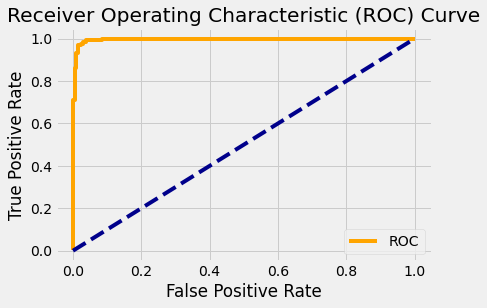

211
Threshold value is: -0.0040811950857568904


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

# Step 2: Standardize features
df_X = pd.DataFrame(StandardScaler().fit_transform(df_X), columns=df_X.columns)

# Step 3: Compute overall mean and class means
mu = np.mean(df_X, axis=0).values.reshape(-1, 1)
mu_k = []
Nc = []

for class_value in np.unique(df_y[0]):
    class_samples = df_X[df_y[0] == class_value].values
    mu_k.append(np.mean(class_samples, axis=0))
    Nc.append(class_samples.shape[0])
mu_k = np.array(mu_k).T

# Step 4: Compute within-class scatter matrix SW
SW = np.zeros((X.shape[1], X.shape[1]))
for i, class_value in enumerate(np.unique(df_y[0])):
    class_samples = df_X[df_y[0] == class_value].values
    centered = class_samples - mu_k[:, i].reshape(1, -1)
    SW += centered.T @ centered

# Step 5: Compute between-class scatter matrix SB
SB = np.dot((Nc * (mu_k - mu)), (mu_k - mu).T)

# Step 6: Solve eigenvalue problem
eigval, eigvec = np.linalg.eig(np.linalg.inv(SW) @ SB)
eigen_pairs = [(np.abs(eigval[i]), eigvec[:, i]) for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Select first eigenvector (largest eigenvalue)
w = eigen_pairs[0][1].real.reshape(-1, 1)

# Step 7: Project data onto 1D
Y = df_X.values @ w
y_scores = Y.ravel()

# Step 8: Manual ROC curve
def roc_curve_manual(y_true, y_scores, thresholds):
    fpr, tpr = [], []
    for t in thresholds:
        y_pred = np.where(y_scores >= t, 1, -1)
        fp = np.sum((y_pred == 1) & (y_true == -1))
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == -1) & (y_true == 1))
        tn = np.sum((y_pred == -1) & (y_true == -1))
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return np.array(fpr), np.array(tpr)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Breast Cancer Dataset, LDA 1D)')
    plt.legend()
    plt.show()

thresholds = np.linspace(y_scores.min(), y_scores.max(), 200)
y_true = np.where(y == 1, 1, -1)  # malignant=1, benign=-1
fpr, tpr = roc_curve_manual(y_true, y_scores, thresholds)
plot_roc_curve(fpr, tpr)

# Optimal threshold (Youden’s J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

# HW3: Independent Component Analysis (ICA) on Synthetic Signals

**Objective:**  
Generate three distinct non-periodic signals, create five different linear mixtures, and apply Independent Component Analysis (ICA) to recover the original sources.

**Steps:**  
1. Generate synthetic signals (logarithmic, polynomial, cubic).  
2. Construct five linear mixtures using a mixing matrix.  
3. Apply ICA (`FastICA`) to separate the mixed signals.  
4. Visualize mixtures, true sources, and recovered sources.  
5. Compare recovery quality visually.  

**Interpretive Notes:**  
- ICA assumes statistical independence of sources and attempts to recover them from mixtures.  
- Unlike PCA, ICA focuses on independence rather than variance.  
- Recovery may differ in scale or sign (ICA is invariant to these), but the shape of signals should match the originals.  

---

## Comparative Insight: PCA vs LDA vs ICA

- **PCA (HW1):**  
  - **Goal:** Maximize variance in projections.  
  - **Nature:** Unsupervised, ignores class labels.  
  - **Use Case:** Dimensionality reduction, visualization, noise filtering.  
  - **Limitation:** May not align with class boundaries → weaker classification performance.

- **LDA (HW2):**  
  - **Goal:** Maximize class separability by balancing between-class and within-class scatter.  
  - **Nature:** Supervised, requires class labels.  
  - **Use Case:** Classification tasks, feature extraction for labeled data.  
  - **Limitation:** Works best for linearly separable classes; less effective for nonlinear boundaries.

- **ICA (HW3):**  
  - **Goal:** Recover statistically independent sources from observed mixtures.  
  - **Nature:** Unsupervised, focuses on independence rather than variance or class separation.  
  - **Use Case:** Blind source separation (e.g., signal processing, audio separation, image decomposition).  
  - **Limitation:** Sensitive to noise and scaling; assumes independence which may not always hold.

---

### Block Summary
The **Dimensionality Reduction block (HW1–HW3)** demonstrates three complementary approaches:
- **PCA:** Variance-preserving projection for visualization and compression.  
- **LDA:** Supervised projection for classification and separability.  
- **ICA:** Independence-based decomposition for source recovery.  

Together, they highlight how different mathematical criteria (variance, separability, independence) lead to distinct applications in machine learning and signal processing.

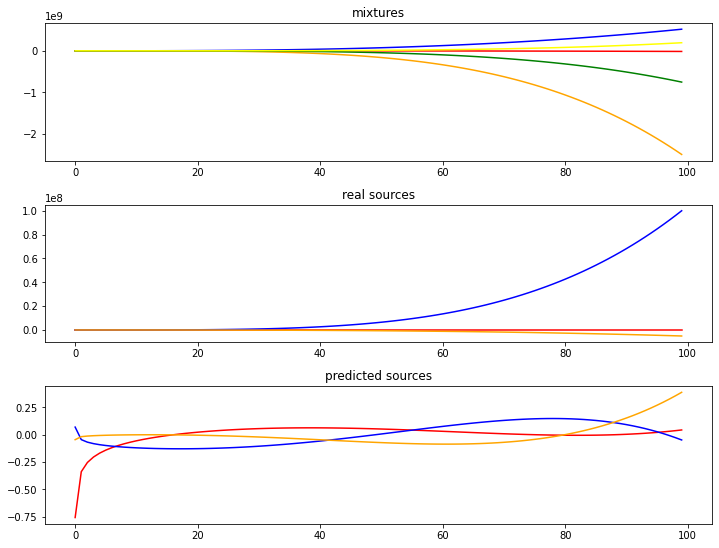

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Step 1: Generate synthetic signals
t = np.linspace(0, 100, 200)  # longer signals for clarity
S = np.c_[
    2 * np.log10(2 * np.pi * t * 13 + 3),   # logarithmic
    t**4 - t + 1,                           # polynomial
    12 - 5*t**2 - 5*t**3                    # cubic
]

# Step 2: Create mixing matrix and mixtures
A = np.array([
    [1, 0, 3],
    [-5, -1, -123],
    [23, -25, 0],
    [7, -8, -9],
    [0, 2, 1]
])
X = S @ A.T  # 5 mixtures

# Step 3: Apply ICA
np.random.seed(42)
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # recovered sources

# Step 4: Visualize mixtures, true sources, and recovered sources
fig = plt.figure(figsize=(12, 10))
models = [X, S, S_]
names = ['Mixtures (5 signals)', 'True Sources (3 signals)', 'Recovered Sources (ICA)']
colors = ['red', 'blue', 'orange', 'green', 'purple']

for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(3, 1, i+1)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
plt.tight_layout()
plt.show()

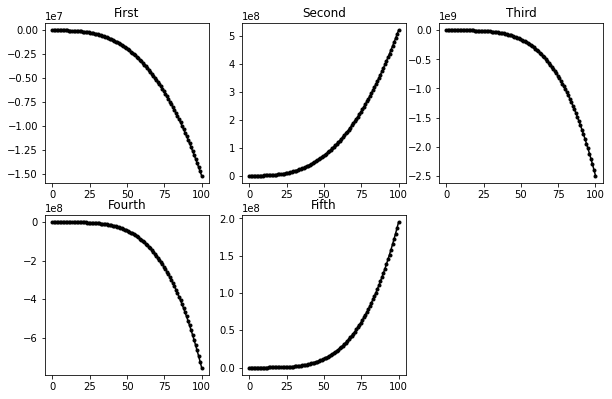

In [ ]:
# Step 5: Plot individual mixtures for inspection
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].plot(t, X[:, i], 'k.-')
    axes[i].set_title(f"Mixture {i+1}")
plt.tight_layout()
plt.show()

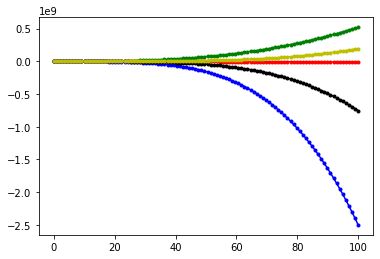

In [ ]:
# Overlay mixtures for comparison
plt.figure(figsize=(8, 5))
plt.plot(t, X[:, 0], 'r.-', label='Mixture 1')
plt.plot(t, X[:, 1], 'g.-', label='Mixture 2')
plt.plot(t, X[:, 2], 'b.-', label='Mixture 3')
plt.plot(t, X[:, 3], 'k.-', label='Mixture 4')
plt.plot(t, X[:, 4], 'y.-', label='Mixture 5')
plt.legend()
plt.title("Overlay of Mixtures")
plt.show()

# HW4: Robust Model Fitting with RANSAC

**Objective:**  
Load synthetic data, visualize its distribution, and apply the RANSAC algorithm to fit an optimal geometric model. Display the best model alongside the data.

**Steps:**  
1. Load dataset (`problem3_data.npy`).  
2. Explore data distribution (summary statistics, histograms, scatter plots).  
3. Implement RANSAC for circle fitting:  
   - Randomly sample points.  
   - Estimate circle parameters (center, radius).  
   - Evaluate model fit using residuals.  
   - Repeat sampling to find the best model.  
4. Visualize the optimal circle model over the data.  

**Interpretive Notes:**  
- RANSAC (Random Sample Consensus) is robust to outliers by iteratively sampling subsets and selecting the model with minimal error.  
- Circle fitting demonstrates how RANSAC can handle noisy data distributions.  
- The final visualization shows the balance between data scatter and the fitted geometric model.  

---

## Comparative Insight: RANSAC vs PCA, LDA, ICA

- **PCA (HW1):**  
  - Focuses on variance preservation.  
  - Reduces dimensionality for visualization and compression.  
  - Unsupervised, not robust to outliers.

- **LDA (HW2):**  
  - Focuses on class separability.  
  - Supervised, requires labels.  
  - Effective for classification but assumes linear boundaries.

- **ICA (HW3):**  
  - Focuses on statistical independence.  
  - Unsupervised, recovers hidden sources from mixtures.  
  - Sensitive to noise but powerful for blind source separation.

- **RANSAC (HW4):**  
  - Focuses on robust model fitting in the presence of outliers.  
  - Iterative sampling ensures the best model is chosen despite noisy data.  
  - Not a dimensionality reduction method, but a **robust estimation technique**.  
  - Commonly used in computer vision (e.g., line/circle fitting, homography estimation).

---

### Block Summary
The **Dimensionality Reduction + Robust Fitting block (HW1–HW4)** demonstrates complementary approaches:
- **PCA, LDA, ICA:** Reduce dimensionality or recover hidden structure.  
- **RANSAC:** Fit models robustly even when data contains noise or outliers.  

Together, they highlight the diversity of numerical methods: some focus on **representation** (PCA, LDA, ICA), while others focus on **robust estimation** (RANSAC).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Step 1: Load dataset
data_array = np.load('/content/problem3_data.npy')
data_array.shape

data_df = pd.DataFrame(data_array, columns=['x', 'y'])

print("Data shape:", data_array.shape)

(100, 2)

In [ ]:

print(data_df.describe())

x           y
count  100.000000  100.000000
mean     5.611450    5.967946
std      7.392802    6.536958
min     -5.498361   -3.606585
25%     -2.802332    0.329035
50%      6.643777    4.588718
75%     12.594739   11.281209
max     15.889777   17.462441

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


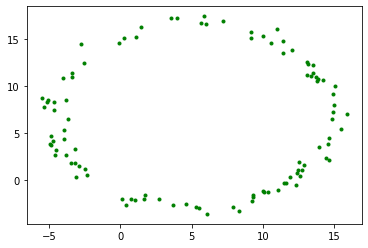

In [ ]:
# Step 2: Visualize data distribution
plt.scatter(data_df['x'], data_df['y'], c='blue', marker='o', label='Data points')
plt.title("Scatter Plot of Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33855d4850>,
      dtype=object)

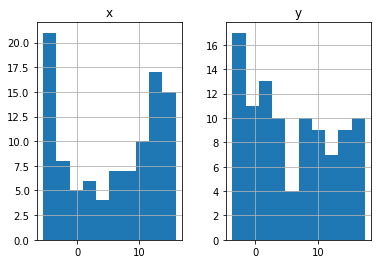

In [ ]:
data_df.hist(figsize=(8, 4))
plt.suptitle("Feature Histograms")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


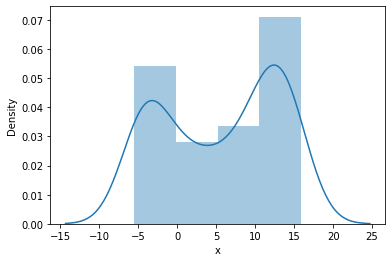

In [ ]:
import seaborn as sns
sns.distplot(data_df['x'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


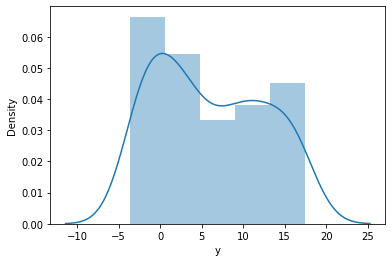

In [ ]:
sns.distplot(data_df['y'])

d min: 38.982687466442954


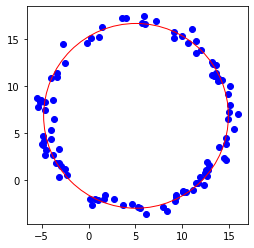

In [ ]:
# Step 3: Implement RANSAC for circle fitting
class RANSACCircle:
    def __init__(self, x_data, y_data, n_iter=400):
        self.x_data = np.array(x_data)
        self.y_data = np.array(y_data)
        self.n_iter = n_iter
        self.best_model = None
        self.min_error = float("inf")

    def random_sampling(self):
        idx = np.random.choice(len(self.x_data), 3, replace=False)
        return [(self.x_data[i], self.y_data[i]) for i in idx]

    def make_model(self, sample):
        pt1, pt2, pt3 = sample
        A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]],
                      [pt3[0] - pt2[0], pt3[1] - pt2[1]]])
        B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2],
                      [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])
        c_x, c_y = (inv(A) @ B / 2).ravel()
        r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)
        return c_x, c_y, r

    def eval_model(self, model):
        c_x, c_y, r = model
        distances = np.sqrt((self.x_data - c_x)**2 + (self.y_data - c_y)**2)
        return np.sum(np.abs(distances - r))

    def execute(self):
        for _ in range(self.n_iter):
            sample = self.random_sampling()
            model = self.make_model(sample)
            error = self.eval_model(model)
            if error < self.min_error:
                self.best_model = model
                self.min_error = error

# Step 4: Run RANSAC and visualize best model
ransac = RANSACCircle(data_df['x'], data_df['y'], n_iter=400)
ransac.execute()

c_x, c_y, r = ransac.best_model
print("Best model center:", (c_x, c_y), " radius:", r)
print("Minimum error:", ransac.min_error)

plt.scatter(data_df['x'], data_df['y'], c='blue', marker='o', label='Data points')
circle = plt.Circle((c_x, c_y), radius=r, color='red', fill=False, label='RANSAC Circle')
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.title("RANSAC Circle Fit")
plt.legend()
plt.show()

# HW5: Euler Method for Solving ODE

**Objective:**  
Solve the ordinary differential equation  



$$
\frac{dy}{dx} = 3x^2y, \quad y(0) = 1
$$



using the explicit Euler method. Compute \(y(2)\) for different step sizes and plot the accuracy relative to the analytical solution.

---

## Comparative Insight: Euler vs Runge–Kutta Methods

- **Euler Method (HW5):**
  - **Goal:** Approximate solutions by linear extrapolation at each step.  
  - **Nature:** First-order method, simple and fast.  
  - **Accuracy:** Error is proportional to step size \(h\).  
  - **Limitation:** Requires very small \(h\) for acceptable accuracy, making it inefficient for stiff or complex ODEs.

- **Runge–Kutta Methods (e.g., RK4):**
  - **Goal:** Improve accuracy by sampling the derivative multiple times within each step.  
  - **Nature:** Higher-order methods (RK4 is fourth-order).  
  - **Accuracy:** Error decreases much faster with step size (proportional to \(h^4\) for RK4).  
  - **Limitation:** More computationally expensive per step, but fewer steps are needed overall.

**Key Takeaway:**  
- Euler’s method is a **baseline solver**: easy to implement, useful for teaching and intuition.  
- Runge–Kutta methods are **practical solvers**: they balance accuracy and efficiency, and are widely used in scientific computing.  
- This exercise highlights the trade-off between **simplicity and precision** in numerical ODE solving.

step: 1e-08, x: 4.989999999999962e-06, true val: 1.0000000000000002, euler val: 1.0


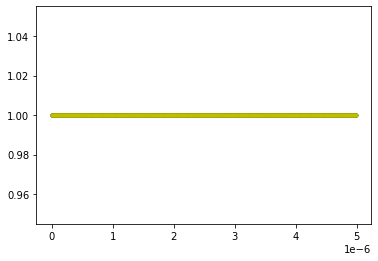

step: 1e-07, x: 4.990000000000037e-05, true val: 1.0000000000001243, euler val: 1.0000000000001203


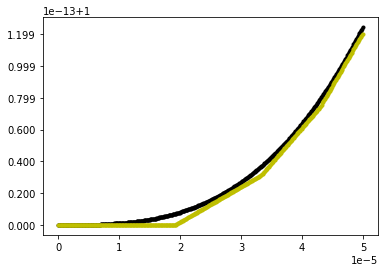

step: 1e-06, x: 0.0004990000000000056, true val: 1.0000000001242515, euler val: 1.000000000124625


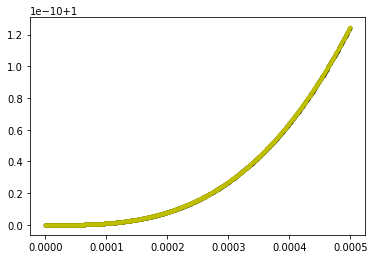

step: 1e-05, x: 0.004989999999999965, true val: 1.0000001242515066, euler val: 1.0000001246252574


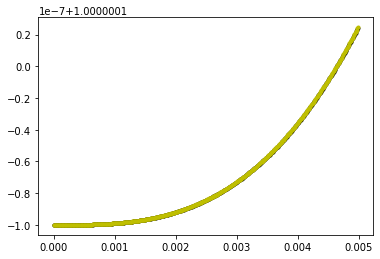

step: 0.0001, x: 0.0499000000000004, true val: 1.0001242592185373, euler val: 1.0001246329880604


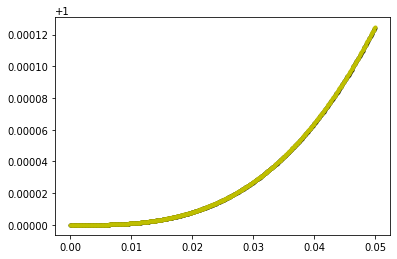

step: 0.001, x: 1.9999999999998905, true val: 2980.9579870378125, euler val: 2914.136131331809


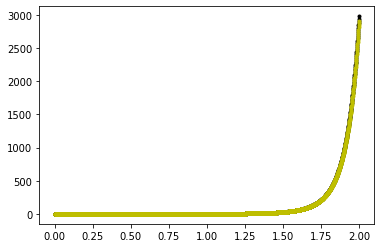

step: 0.01, x: 2.0000000000000013, true val: 2980.957987041776, euler val: 2402.204710468913


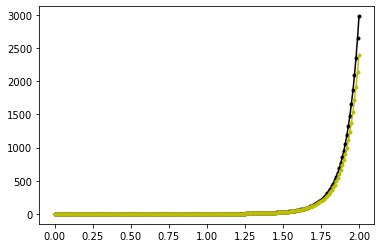

step: 0.1, x: 2.0000000000000004, true val: 2980.957987041744, euler val: 670.9318768334348


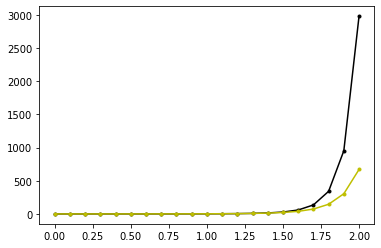

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define ODE and analytical solution
def f(x, y):
    return 3 * x**2 * y

def y_exact(x):
    return np.exp(x**3)

# Step 2: Euler method implementation
def euler_method(h, x0=0, y0=1, x_end=2):
    n = int((x_end - x0) / h) + 1
    xs = np.linspace(x0, x_end, n)
    ys = np.zeros(n)
    ys[0] = y0
    for i in range(1, n):
        ys[i] = ys[i-1] + h * f(xs[i-1], ys[i-1])
    return xs, ys

# Step 3: Step sizes to test
steps = [10**(-8), 10**(-7), 10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1)]

errors = []
for h in steps:
    xs, ys = euler_method(h)
    y_euler = ys[-1]
    y_true = y_exact(xs[-1])
    error = abs(y_true - y_euler) / abs(y_true)
    errors.append(error)
    print(f"Step size: {h:.1e}, y_true: {y_true:.6f}, y_euler: {y_euler:.6f}, relative error: {error:.2e}")

    # Plot solution curves for selected step sizes
    if h in [1e-1, 1e-3, 1e-5]:
        plt.plot(xs, ys, label=f"Euler h={h}")
        plt.plot(xs, y_exact(xs), 'k--', label="Analytical")
        plt.title(f"Euler vs Analytical Solution (h={h})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

# Step 4: Plot error vs step size
plt.loglog(steps, errors, 'ro-')
plt.xlabel("Step size (h)")
plt.ylabel("Relative error at x=2")
plt.title("Euler Method Accuracy vs Step Size")
plt.grid(True, which="both", ls="--")
plt.show()

# HW6: Polynomial Fitting with Least Squares

**Objective:**  
Load synthetic data, visualize its distribution, and fit a 7th-degree polynomial using the least squares method. Plot the fitted curve and compute the mean squared error (MSE).

---

## Comparative Insight: Polynomial Regression vs Linear Regression

- **Linear Regression:**
  - **Goal:** Fit a straight line to minimize squared residuals.  
  - **Nature:** Simple, interpretable, robust.  
  - **Use Case:** When the relationship between variables is approximately linear.  
  - **Limitation:** Cannot capture nonlinear patterns; underfits complex data.

- **Polynomial Regression (HW6):**
  - **Goal:** Extend linear regression by adding polynomial terms (e.g., $$x^2, x^3, \ldots, x^7$$).  
  - **Nature:** Flexible, can approximate nonlinear relationships.  
  - **Use Case:** When data shows curvature or complex trends.  
  - **Limitation:** High-degree polynomials risk **overfitting** — capturing noise instead of signal.  
  - **MSE:** Provides a quantitative measure of fit quality, but low error on training data may not generalize.

**Key Takeaway:**  
- Linear regression is **stable and interpretable**, but limited in flexibility.  
- Polynomial regression is **powerful and expressive**, but prone to instability and overfitting at high degrees.  
- This exercise highlights the trade-off between **simplicity and flexibility** in regression modeling.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 1: Load dataset
data_array = np.load('/content/problem5_data.npy')
data_df = pd.DataFrame(data_array, columns=['x', 'y'])
print("Data shape:", data_array.shape)

(50, 2)

In [ ]:
print(data_df.describe())

x          y
count  50.000000  50.000000
mean    4.032161  -0.711232
std     3.025058   1.860916
min    -0.547739  -3.997522
25%     1.487437  -2.395571
50%     3.422111  -0.757789
75%     7.077889   0.835322
max     8.798995   2.355140

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [ ]:
data_df.head(15)

x         y
0   8.195980  1.690982
1   8.396985  2.355140
2   3.874372 -0.561960
3   2.065327 -1.959496
4   2.065327 -1.959496
5   1.462312 -2.653636
6   7.040201  0.844677
7   3.221106  0.054607
8   1.713568 -2.394253
9   6.286432 -0.370356
10  8.547739  1.485243
11  1.211055 -2.696477
12  8.296482  2.083372
13  0.507538 -3.038306
14  1.814070 -2.279657

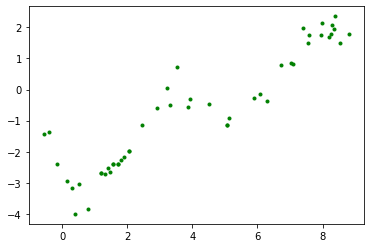

In [ ]:
# Step 2: Visualize data distribution
plt.scatter(data_df['x'], data_df['y'], c='green', marker='.', label='Data points')
plt.title("Scatter Plot of Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65f9e49690>,
      dtype=object)

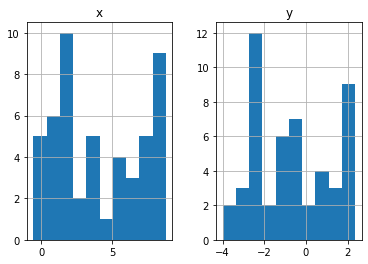

In [ ]:
data_df.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


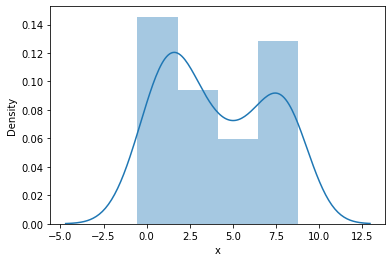

In [ ]:
sns.distplot(data_df['x'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


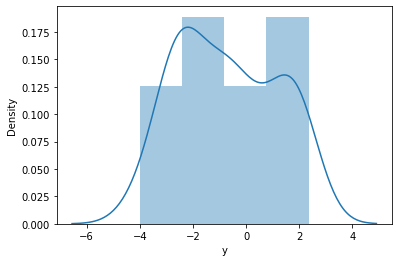

In [ ]:
sns.distplot(data_df['y'])

In [ ]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data_df['x'], data_df['y'], test_size=0.2, random_state=42, shuffle=True
)

$$y = \theta_0 + a_1\theta_1 + \ldots+ a_n\theta_n + a_1^2\theta_{11} + a_1a_2\theta_{12}+ \ldots +a_n^2\theta_{nn} + ... + + a_1^7\theta_{<7*1>} + a_1a_2a_3a_4a_5a_6a_7\theta_{1234567}+ \ldots +a_n^7\theta_{<7*n>}= \theta_0 + \sum_{i=1}^{n}a_i\theta_i + \sum_{i=1}^{n}\sum_{j=1}^{n}a_ia_j\theta_{ij} + ... + \sum_{i=1}^{n}\sum_{j=1}^{n}\sum_{k=1}^{n}\sum_{l=1}^{n}\sum_{p=1}^{n}\sum_{q=1}^{n}\sum_{r=1}^{n}a_ia_ja_ka_la_pa_qa_r\theta_{ijklpqr}$$

*$$y = \theta_0 + a\theta_1 + a^2\theta_{2} + ... + a^7\theta_{7}$$

In [ ]:
# Step 4: Construct polynomial features up to degree 7
def poly_features(X, degree=7):
    return np.hstack([X**i for i in range(1, degree+1)] + [np.ones((X.shape[0], 1))])

A = poly_features(X_train.values.reshape(-1, 1), degree=7)

# Step 5: Solve least squares problem
B = A.T @ A
y_vec = A.T @ y_train.values
theta = la.pinv(B) @ y_vec
print("Estimated coefficients:", theta)

[-2.07428396e+00  1.02049251e+00  7.65410039e-01 -5.04371408e-01
  1.05675986e-01 -9.51164497e-03  3.14908436e-04 -2.55318043e+00]


In [ ]:
# Step 6: Predict on test data
A_test = poly_features(X_test.values.reshape(-1, 1), degree=7)
y_pred = A_test @ theta
y_real = y_test.values

# Compute mean squared error
mse = np.mean((y_pred - y_real)**2)
print("Mean Squared Error:", mse)

0.37990094047864176


In [ ]:
print(y_real.min(), y_real.max(), y_real.mean())

-3.9975217597066495 1.9650265980672486 -1.0852204439491548


In [ ]:
y_real

array([-3.03830649, -0.91180401,  1.49892417, -0.14017213, -3.99752176,
        1.9650266 , -1.14861154, -2.39601088, -2.17780062, -0.50592778])

In [ ]:
y_pred

array([-3.27308403, -0.7808401 ,  1.6083893 , -0.4002324 , -3.18950403,
        1.43189645, -0.77011186, -2.23182913, -1.90941409, -0.17127594])

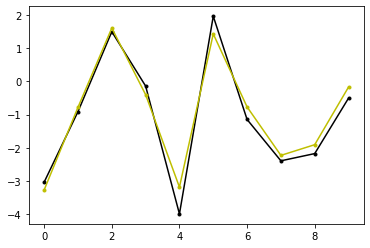

In [ ]:
# Step 7: Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_real, c='black', marker='.', label='Actual')
plt.scatter(X_test, y_pred, c='yellow', marker='.', label='Predicted')
plt.title("Polynomial Fit (Degree 7)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# HW7: Dimensionality Reduction and Visualization (Digits Dataset)

**Objective:**  
Load the digits dataset, select digits 3, 5, and 8, and project them onto a 2D plane using three different dimensionality reduction algorithms: **t-SNE**, **Isomap**, and **PCA**. Visualize the projections with different colors for each digit and interpret the results.

**Steps:**  
1. Load the digits dataset from `sklearn.datasets`.  
2. Filter samples for digits 3, 5, and 8.  
3. Apply dimensionality reduction methods (t-SNE, Isomap, PCA).  
4. Visualize 2D projections with color-coded classes.  
5. Compare and interpret the results.  

**Interpretive Notes:**  
- **t-SNE:** Preserves local neighborhoods, often producing well-separated clusters for visualization.  
- **Isomap:** Preserves global geometry by approximating geodesic distances; useful for manifold learning.  
- **PCA:** Linear projection maximizing variance; may not separate classes well if they overlap in variance directions.  
- Digits with similar shapes (e.g., 3 and 5) may overlap more, while distinct digits (like 8) may form clearer clusters.

---
## Comparative Insight: t-SNE vs Isomap vs PCA
- **t-SNE**:
  - Nonlinear, focuses on local neighborhoods.
  - Produces visually distinct clusters, ideal for exploratory visualization.
  - May distort global distances.
- **Isomap:**
  - Nonlinear, preserves global manifold structure.
  - Useful when data lies on a curved surface.
  - Sensitive to choice of neighbors.
- **PCA**:
  - Linear, maximizes variance.
  - Fast and interpretable, but limited in separating overlapping classes.
  - Often used as a baseline before nonlinear methods.

**Key Takeaway**:
- PCA provides a linear baseline.
- Isomap captures global geometry.
- t-SNE excels at local clustering and visualization.
- Together, they illustrate how different dimensionality reduction methods emphasize different aspects of the data.


(1797, 64) (1797,)


<Figure size 432x288 with 0 Axes>

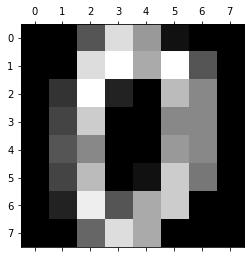

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

# Step 1: Load dataset
digits = load_digits()
print("Data shape:", digits.data.shape, "Target shape:", digits.target.shape)

plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
# Step 2: Filter digits 3, 5, 8
digits_df = pd.concat([
    pd.DataFrame(digits.data, columns=[str(i) for i in range(64)]),
    pd.DataFrame(digits.target, columns=['target'])
], axis=1)

digits_df_358 = digits_df[digits_df["target"].isin([3, 5, 8])]
digits_df_358

0    1     2     3     4     5  ...    59    60    61   62   63  target
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  13.0  13.0   9.0  0.0  0.0       3
5     0.0  0.0  12.0  10.0   0.0   0.0  ...  16.0  16.0  10.0  0.0  0.0       5
8     0.0  0.0   9.0  14.0   8.0   1.0  ...  16.0  15.0  11.0  1.0  0.0       8
13    0.0  2.0   9.0  15.0  14.0   9.0  ...  12.0  13.0  11.0  0.0  0.0       3
15    0.0  5.0  12.0  13.0  16.0  16.0  ...  16.0   2.0   0.0  0.0  0.0       5
...   ...  ...   ...   ...   ...   ...  ...   ...   ...   ...  ...  ...     ...
1787  0.0  0.0  10.0  16.0  15.0   1.0  ...  13.0  10.0   4.0  0.0  0.0       5
1789  0.0  0.0   8.0  16.0   3.0   0.0  ...  16.0  10.0   1.0  0.0  0.0       8
1790  0.0  0.0   5.0  12.0   8.0   0.0  ...  12.0  12.0   3.0  0.0  0.0       8
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...   9.0  13.0   6.0  0.0  0.0       8
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  12.0  14.0  12.0  1.0  0.0       8

[539 rows x 65 columns]

In [ ]:
X_data = digits_df_358.loc[:, '0':'63'].values
Y_data = digits_df_358['target'].values
print("Filtered shape:", X_data.shape, Y_data.shape)

(539, 64) (539,)


In [ ]:
# Step 3: Apply dimensionality reduction
X_2d_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_data)
X_2d_isomap = Isomap(n_components=2).fit_transform(X_data)
X_2d_pca = PCA(n_components=2, random_state=42).fit_transform(X_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


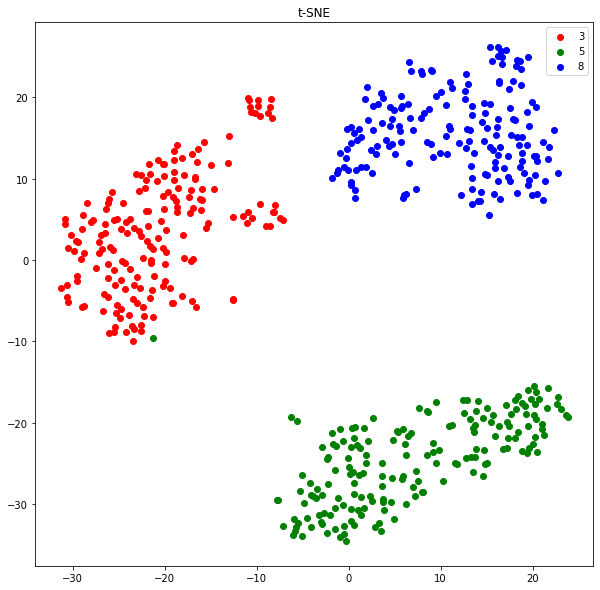

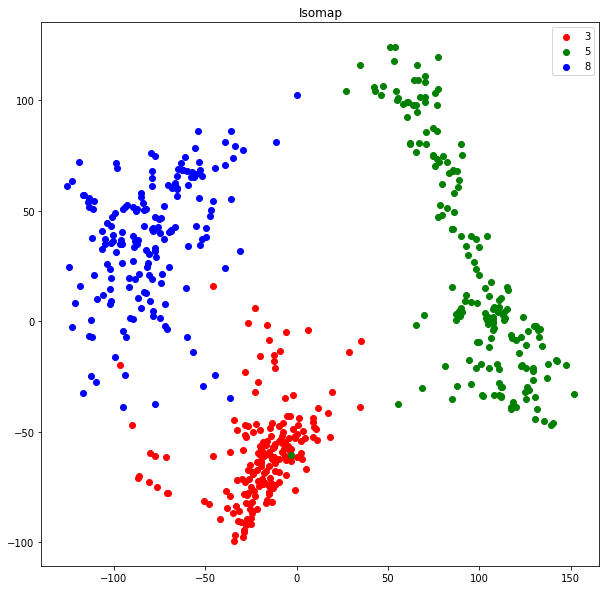

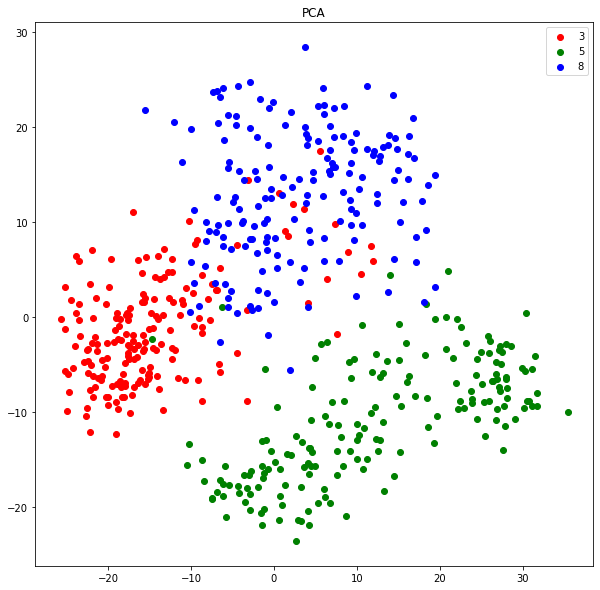

In [ ]:
# Step 4: Visualization function
def plot_embedding(X_2d, Y_data, title):
    plt.figure(figsize=(8, 8))
    colors = ['r', 'g', 'b']
    labels = [3, 5, 8]
    for i, c, label in zip(labels, colors, labels):
        plt.scatter(X_2d[Y_data == i, 0], X_2d[Y_data == i, 1], c=c, label=f"Digit {label}", alpha=0.7)
    plt.legend()
    plt.title(title)
    plt.show()

# Step 5: Plot results
plot_embedding(X_2d_tsne, Y_data, "t-SNE Projection")
plot_embedding(X_2d_isomap, Y_data, "Isomap Projection")
plot_embedding(X_2d_pca, Y_data, "PCA Projection")

# HW8: Monte Carlo Integration

**Objective:**  
Approximate the integral  



$$
I = \int_{0}^{\sqrt{2\pi}} x \sin\left(\frac{x^2}{2}\right) dx
$$



using the Monte Carlo method with sample sizes $$10^2, 10^3, 10^4, 10^5$$. Compare results with the analytical solution and compute absolute and relative errors.

**Steps:**  
1. Derive the analytical solution.  
2. Implement Monte Carlo integration with uniform sampling.  
3. Implement importance sampling for variance reduction.  
4. Compute approximations for different sample sizes.  
5. Report absolute and relative errors.  
6. Visualize convergence behavior.  

**Interpretive Notes:**  
- Monte Carlo integration approximates integrals by averaging function values at random points.  
- Larger sample sizes reduce variance and improve accuracy.  
- Importance sampling improves efficiency by aligning sampling distribution with the integrand’s shape.  
- Error analysis shows convergence toward the analytical solution as \(N \to \infty\).
---
## Comparative Insight: Uniform vs Importance Sampling
- **Uniform Sampling**:
  - Simple, unbiased.
  - Requires large 𝑁 for accuracy.
  - Variance can be high if integrand is uneven.
- **Importance Sampling**:
  - Samples according to a distribution closer to the integrand’s shape.
  - Reduces variance, improves efficiency.
  - More complex to design sampling distribution.

**Key Takeaway:**  
Monte Carlo integration converges slowly compared to deterministic methods, but importance sampling can significantly improve accuracy for the same number of samples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Analytical solution
# Integral of x*sin(x^2/2) dx = -cos(x^2/2)
# Evaluate from 0 to sqrt(2π)
I_real = np.cos(0) - np.cos(np.pi)
print("Analytical solution:", I_real)

2.0

In [ ]:
# Step 2: Define integrand
def f(x):
    return x * np.sin(x**2 / 2)

# Step 3: Monte Carlo with uniform sampling
def mc_uniform(a, b, N):
    x = np.random.uniform(a, b, N)
    return (b - a) * np.mean(f(x))

# Step 4: Importance sampling
def f2(x):
    return np.pi * np.sin(x**2 / 2)

def mc_importance(N):
    u = np.random.random(size=N)
    x = np.sqrt(2 * np.pi * u)  # transform uniform [0,1] to [0, sqrt(2π)]
    return np.mean(f2(x))

In [ ]:
a = 0
b = np.sqrt(2*np.pi)
I = []
N = [10**2, 10**3, 10**4, 10**5]
for n in N:
  ar = np.zeros(n)
  for i in range(n):
	  ar[i] = random.uniform(a,b)
  I.append(MC(ar,a,b,n))

In [ ]:
# Step 5: Run experiments
a, b = 0, np.sqrt(2 * np.pi)
N_values = [10**2, 10**3, 10**4, 10**5]

results_uniform = []
results_importance = []

for N in N_values:
    I_uniform = mc_uniform(a, b, N)
    I_importance = mc_importance(N)
    results_uniform.append(I_uniform)
    results_importance.append(I_importance)
    abs_err_uniform = abs(I_uniform - I_real)
    rel_err_uniform = abs_err_uniform / abs(I_real)
    abs_err_importance = abs(I_importance - I_real)
    rel_err_importance = abs_err_importance / abs(I_real)
    print(f"N={N}: Uniform MC={I_uniform:.6f}, Importance MC={I_importance:.6f}, Real={I_real:.6f}")
    print(f"   Uniform: abs_err={abs_err_uniform:.2e}, rel_err={rel_err_uniform:.2e}")
    print(f"   Importance: abs_err={abs_err_importance:.2e}, rel_err={rel_err_importance:.2e}")

In [ ]:
#Uniform

N: 100, mc answer: 1.841031226154985, real answer: 2.0,      abs(mc - real) : 0.15896877384501495,       abs(mc - real) / real 0.07948438692250748
N: 1000, mc answer: 2.053019457201813, real answer: 2.0,      abs(mc - real) : 0.05301945720181278,       abs(mc - real) / real 0.02650972860090639
N: 10000, mc answer: 1.996644430158571, real answer: 2.0,      abs(mc - real) : 0.0033555698414289292,       abs(mc - real) / real 0.0016777849207144646
N: 100000, mc answer: 2.0002038287082553, real answer: 2.0,      abs(mc - real) : 0.00020382870825530475,       abs(mc - real) / real 0.00010191435412765237


In [ ]:
#Importance

N: 100, mc answer: 2.1069235281838217, real answer: 2.0,      abs(mc - real) : 0.10692352818382167,       abs(mc - real) / real 0.053461764091910835
N: 1000, mc answer: 2.0201761700373373, real answer: 2.0,      abs(mc - real) : 0.020176170037337293,       abs(mc - real) / real 0.010088085018668647
N: 10000, mc answer: 2.0082509433609994, real answer: 2.0,      abs(mc - real) : 0.008250943360999408,       abs(mc - real) / real 0.004125471680499704
N: 100000, mc answer: 1.994147375083185, real answer: 2.0,      abs(mc - real) : 0.00585262491681493,       abs(mc - real) / real 0.002926312458407465


In [ ]:
# Step 6: Visualize convergence
plt.figure(figsize=(8,5))
plt.loglog(N_values, [abs(r - I_real) for r in results_uniform], 'ro-', label='Uniform MC Error')
plt.loglog(N_values, [abs(r - I_real) for r in results_importance], 'bs-', label='Importance MC Error')
plt.xlabel("Number of samples (N)")
plt.ylabel("Absolute error")
plt.title("Monte Carlo Integration Error vs Sample Size")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# HW9: Gradient Descent on the Rosenbrock Function

**Objective:**  
Implement the gradient descent algorithm and apply it to the Rosenbrock function, starting from the point [5, -3]. Use a fixed step size (initially 0.1), halving it every 100 iterations. Report the final result after convergence and the number of iterations required.

**Rosenbrock Function:**  

$$
f(x_1, x_2) = (1 - x_1)^2 + 100 \cdot (x_2 - x_1^2)^2
$$

- Global minimum: $$f(1, 1) = 0$$.  
- Location: $$(x_1, x_2) = (1.0, 1.0)$$.  

**Steps:**  
1. Define the Rosenbrock function and its gradient.  
2. Implement gradient descent with step size decay.  
3. Track the optimization path.  
4. Visualize the trajectory on the contour plot.  
5. Report final coordinates, function value, and iteration count.  

**Interpretive Notes:**  
- The Rosenbrock function is a classic test for optimization algorithms due to its narrow, curved valley.  
- Gradient descent may converge slowly if the learning rate is too small, or diverge if too large.  
- Step size decay helps balance exploration (large steps) and convergence (small steps).

---

## Comparative Insight: Gradient Descent vs Other Optimizers
- **Gradient Descent (HW9):**
  - Simple, widely used baseline.
  - Sensitive to learning rate choice.
  - May converge slowly in narrow valleys (like Rosenbrock).
- **Momentum / Nesterov Accelerated Gradient:**
  - Adds inertia to updates, helping escape shallow regions.
  - Faster convergence in curved valleys.
- **Adaptive Methods (Adam, RMSProp):**
  - Adjust learning rates per parameter.
  - Robust to different scales and curvature.
  - Often preferred in deep learning.

**Key Takeaway:**  
Gradient descent is a **foundational optimizer**, but modern variants (**Momentum**, **Adam**) improve speed and robustness. **The Rosenbrock function** illustrates why adaptive methods are often necessary in practice.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define Rosenbrock function and gradient
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    return np.array([
        2*(x[0] - 1) - 400*x[0]*(x[1] - x[0]**2),
        200*(x[1] - x[0]**2)
    ])

# Step 2: Gradient descent implementation
def gradient_descent(start, lr=0.1, max_iter=2000, tol=1e-6):
    x = np.array(start, dtype=float)
    path = [x.copy()]
    for i in range(max_iter):
        if i % 100 == 0 and i > 0:
            lr /= 2  # step size decay
        grad = grad_rosenbrock(x)
        x_new = x - lr * grad
        path.append(x_new)
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged at iteration {i}")
            break
        x = x_new
    return np.array(path), i, x

# Step 3: Run optimization
start_point = [5, -3]
path, steps, final_point = gradient_descent(start_point, lr=0.1)

print(f"Final point: {final_point}, Function value: {rosenbrock(final_point):.6f}, Steps: {steps}")

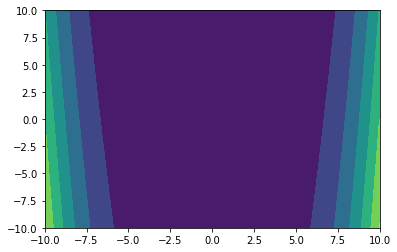

In [ ]:
# Step 4: Visualization
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock([X, Y])

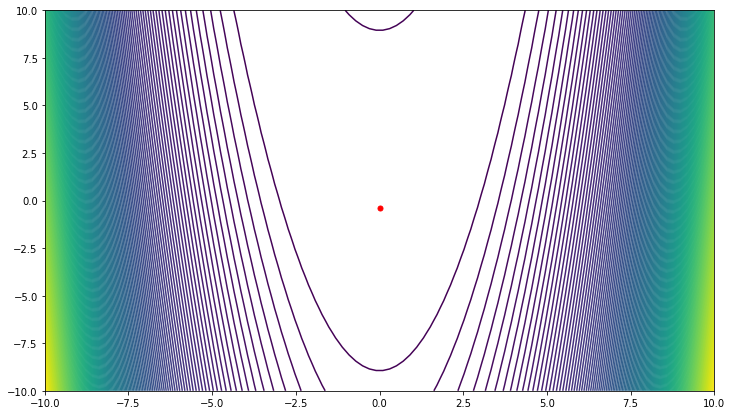

In [ ]:
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=200, cmap='viridis')
plt.plot(path[:,0], path[:,1], 'r.-', label='Gradient Descent Path')

steps: 300, lr: 6.25e-06, (x,y): (0.026203199299379986,-0.41825718501528253)


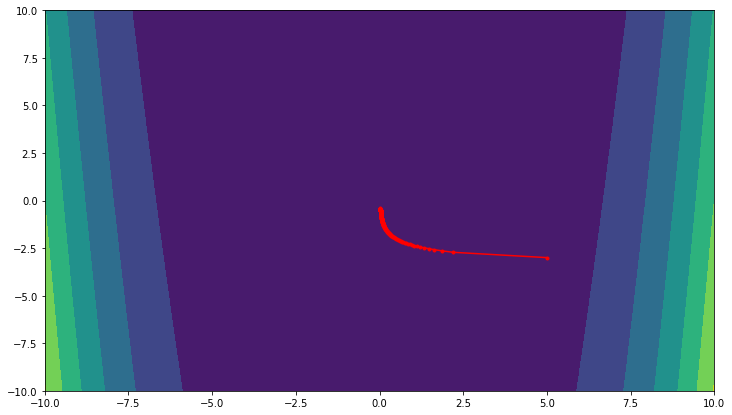

In [ ]:
plt.scatter([start_point[0]], [start_point[1]], c='white', marker='o', label='Start')
plt.scatter([1], [1], c='yellow', marker='*', s=200, label='Global Minimum')
plt.title("Gradient Descent on Rosenbrock Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# HW10: Hybrid Images with Fourier Filtering

![](https://jeremykun.files.wordpress.com/2014/09/marilyn-einstein-hybrid-collage.png)

**Objective:**  
Create hybrid images by combining two images:  
- One processed with a **low-pass filter** (retains smooth, low-frequency components).  
- One processed with a **high-pass filter** (retains sharp, high-frequency components).  

The cutoff frequency parameter controls how the final hybrid image looks. By adjusting it, we can emphasize either the coarse structure or fine details.

**Steps:**  
1. Load image pairs.  
2. Construct Gaussian low-pass and high-pass filters in the frequency domain.  
3. Apply Fourier transform, filter, and inverse transform.  
4. Combine filtered images to form hybrid images.  
5. Visualize intermediate results (spectra, filtered images, hybrid image).  

**Interpretive Notes:**  
- Low-pass filtering smooths the image, removing fine details.  
- High-pass filtering emphasizes edges and textures.  
- Hybrid images exploit human perception: from a distance, low-frequency content dominates; up close, high-frequency details are visible.  

---

## Comparative Insight: Hybrid Images vs Standard Filtering
- **Standard Filtering (Low-pass / High-pass):**
  - Used individually for smoothing or edge detection.
  - Produces either blurred or sharpened images.
- **Hybrid Images (HW10):**
  - Combine both filtered versions.
  - Exploit human perception: low frequencies dominate at a distance, high frequencies dominate up close.
  - Applications: artistic effects, visual illusions, multi-scale image analysis.

**Key Takeaway:**  
Hybrid images demonstrate how frequency-domain filtering can be combined to create perceptual illusions, highlighting the importance of scale in visual processing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math

# Step 1: Utility functions
def scaleSpectrum(A):
    return np.real(np.log10(np.abs(A) + np.ones(A.shape)))

def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
    centerI = numRows // 2
    centerJ = numCols // 2
    def gaussian(i, j):
        coeff = math.exp(-((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
        return 1 - coeff if highPass else coeff
    return np.array([[gaussian(i, j) for j in range(numCols)] for i in range(numRows)])

def filterDFT(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix
    return np.real(ifft2(ifftshift(filteredDFT)))

def lowPass(imageMatrix, sigma):
    n, m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))

def highPass(imageMatrix, sigma):
    n, m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))

def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)
    return highPassed + lowPassed

# Step 2: Load images (example pair)
img1 = imageio.imread("/content/plane.bmp", as_gray=True)
img2 = imageio.imread("/content/bird.bmp", as_gray=True)

# Step 3: Create hybrid image
hybrid = hybridImage(img1, img2, sigmaHigh=25, sigmaLow=10)

# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("High-Frequency Image")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Low-Frequency Image")

plt.subplot(1, 3, 3)
plt.imshow(hybrid, cmap='gray')
plt.title("Hybrid Image")

plt.tight_layout()
plt.show()

# HW11: Fitting a Planet’s Orbit

**Objective:**  
Fit a planet’s orbit using observational data points (x, y). Apply least squares regression to approximate orbital behavior, then test robustness by adding perturbations (measurement noise). Compare fitted orbit for original and perturbed data.

**Steps:**  
1. Load observational data (coordinates of orbit).  
2. Visualize raw orbit data.  
3. Construct polynomial/interaction features (e.g., $$x, y, xy, y^2$$).  
4. Solve least squares regression for orbital fitting.  
5. Compute mean squared error (MSE) for fit quality.  
6. Add perturbations to simulate noisy measurements.  
7. Compare fitted orbit for original vs perturbed data.  
8. Visualize results side by side.  

**Interpretive Notes:**  
- Orbital fitting often requires nonlinear regression due to elliptical trajectories.  
- Least squares provides a simple approximation, but sensitivity to noise can distort the fit.  
- Comparing original vs perturbed data highlights robustness of the model.  

---

## Comparative Insight: Orbit Fitting vs Other Regression Tasks
- **Orbit Fitting (HW11)**:
  - Nonlinear regression required due to elliptical trajectories.
  - Sensitive to measurement noise (perturbations).
  - Useful for astronomy and physics modeling.
- **Polynomial Regression (HW6)**:
  - Flexible for nonlinear trends, but risks overfitting.
  - Similar technique applied here for orbital data.
- **RANSAC (HW4)**:
  - Robust to outliers, could be applied to orbit fitting for noisy astronomical data.

**Key Takeaway:**  
Orbit fitting demonstrates how regression can approximate physical trajectories, but robustness to noise is critical. Combining least squares with robust methods (like RANSAC) can improve reliability in real-world astronomy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

# Step 1: Load observational data
q1a_data = np.array([
    [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], # x
    [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15]  # y
])
q1b_data = np.array([
    [-0.0029, 0.0007, -0.0082, -0.0038, -0.0041, 0.0026, -0.0001, -0.0058, -0.0005, -0.0034], # Δx
    [-0.0033, 0.0043,  0.0006,  0.0020,  0.0044, 0.0009,  0.0028,  0.0034,  0.0059,  0.0024]  # Δy
])

data_df = pd.DataFrame(q1a_data.T, columns=['x','y'])
data_df.describe()

x         y
count  10.000000  10.00000
mean    0.575000   0.20600
std     0.342904   0.09252
min     0.010000   0.12000
25%     0.335000   0.13500
50%     0.615000   0.16500
75%     0.845000   0.25750
max     1.020000   0.39000

In [ ]:
data_df

x     y
0  1.02  0.39
1  0.95  0.32
2  0.87  0.27
3  0.77  0.22
4  0.67  0.18
5  0.56  0.15
6  0.44  0.13
7  0.30  0.12
8  0.16  0.13
9  0.01  0.15

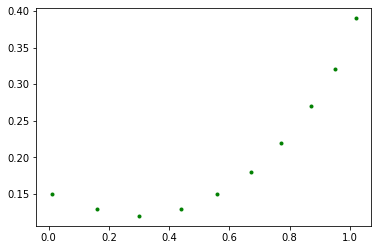

In [ ]:
# Step 2: Visualize raw orbit data
plt.scatter(data_df['x'], data_df['y'], c='green', marker='o', label='Original Data')
plt.title("Planet Orbit Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73bda120d0>,
      dtype=object)

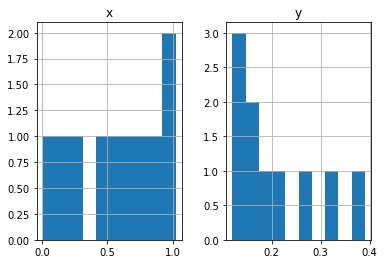

In [ ]:
data_df.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


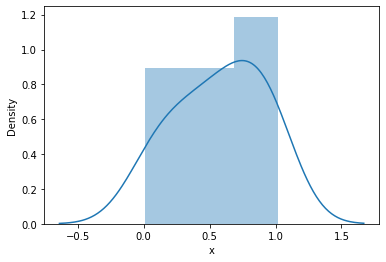

In [ ]:
sns.distplot(data_df['x'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


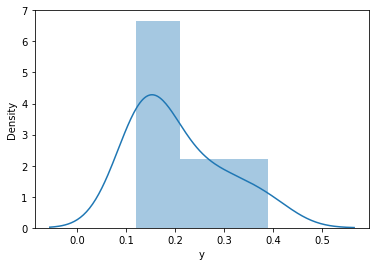

In [ ]:
sns.distplot(data_df['y'])

In [ ]:
# Step 3: Construct polynomial/interaction features
A_x = data_df['x'].values.reshape(-1,1)
A_y = data_df['y'].values.reshape(-1,1)
A_xy = A_x * A_y
A_y2 = A_y**2
A_x2 = A_x**5  # chosen nonlinear term
A = np.hstack((A_x, A_y, A_xy, A_y2, np.ones((A_x.shape[0],1))))
print(A.shape)

(10, 5)


In [ ]:
A, A.shape

(array([[1.02  , 0.39  , 0.3978, 0.1521, 1.    ],
        [0.95  , 0.32  , 0.304 , 0.1024, 1.    ],
        [0.87  , 0.27  , 0.2349, 0.0729, 1.    ],
        [0.77  , 0.22  , 0.1694, 0.0484, 1.    ],
        [0.67  , 0.18  , 0.1206, 0.0324, 1.    ],
        [0.56  , 0.15  , 0.084 , 0.0225, 1.    ],
        [0.44  , 0.13  , 0.0572, 0.0169, 1.    ],
        [0.3   , 0.12  , 0.036 , 0.0144, 1.    ],
        [0.16  , 0.13  , 0.0208, 0.0169, 1.    ],
        [0.01  , 0.15  , 0.0015, 0.0225, 1.    ]]), (10, 5))

In [ ]:
A.T, A.T.shape

(array([[1.02  , 0.95  , 0.87  , 0.77  , 0.67  , 0.56  , 0.44  , 0.3   ,
         0.16  , 0.01  ],
        [0.39  , 0.32  , 0.27  , 0.22  , 0.18  , 0.15  , 0.13  , 0.12  ,
         0.13  , 0.15  ],
        [0.3978, 0.304 , 0.2349, 0.1694, 0.1206, 0.084 , 0.0572, 0.036 ,
         0.0208, 0.0015],
        [0.1521, 0.1024, 0.0729, 0.0484, 0.0324, 0.0225, 0.0169, 0.0144,
         0.0169, 0.0225],
        [1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
         1.    , 1.    ]]), (5, 10))

In [ ]:
# Step 4: Solve least squares regression
B = A.T @ A
B

array([[ 4.3645    ,  1.4262    ,  1.19651   ,  0.402106  ,  5.75      ],
       [ 1.4262    ,  0.5014    ,  0.402106  ,  0.141122  ,  2.06      ],
       [ 1.19651   ,  0.402106  ,  0.3611383 ,  0.12462594,  1.4262    ],
       [ 0.402106  ,  0.141122  ,  0.12462594,  0.04411798,  0.5014    ],
       [ 5.75      ,  2.06      ,  1.4262    ,  0.5014    , 10.        ]])

In [ ]:
A_x2, A_x2.shape

(array([[1.10408080e+00],
        [7.73780937e-01],
        [4.98420921e-01],
        [2.70678416e-01],
        [1.35012511e-01],
        [5.50731776e-02],
        [1.64916224e-02],
        [2.43000000e-03],
        [1.04857600e-04],
        [1.00000000e-10]]), (10, 1))

In [ ]:
y_vec = A.T @ A_x2
y_vec

array([[2.63260434],
       [0.90733668],
       [0.85930638],
       [0.3025306 ],
       [2.85607325]])

In [ ]:
theta = la.pinv(B) @ y_vec
print(theta)

[[-0.70494362]
 [-0.70825998]
 [ 5.35805597]
 [-0.961838  ]
 [ 0.12091208]]


In [ ]:
# Step 5: Predictions and error
y_pred = A @ theta
y_real = A_x2
mse = np.mean((y_pred - y_real)**2)
print("MSE (original data):", mse)

0.009320856044738528


In [ ]:
print(y_real.min(), y_real.max(), y_real.mean())

1.0000000000000002e-10 1.1040808032 0.28560732455


In [ ]:
y_real

array([[1.10408080e+00],
       [7.73780937e-01],
       [4.98420921e-01],
       [2.70678416e-01],
       [1.35012511e-01],
       [5.50731776e-02],
       [1.64916224e-02],
       [2.43000000e-03],
       [1.04857600e-04],
       [1.00000000e-10]])

In [ ]:
y_pred

array([[ 1.1107873 ],
       [ 0.75492925],
       [ 0.50487029],
       [ 0.28339002],
       [ 0.13613105],
       [ 0.04834   ],
       [ 0.00888883],
       [ 0.00347734],
       [ 0.0112398 ],
       [-0.00598063]])

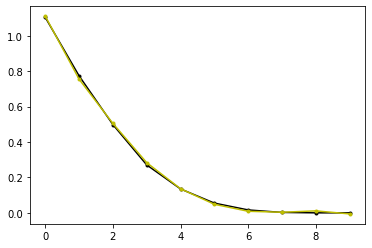

In [ ]:
t = [ i for i in range(y_real.shape[0])]
plt.plot(t,y_real,'k.-')
plt.plot(t,y_pred,'y.-')
plt.show()

In [ ]:
# Step 6: Perturb data
perturbed_data = q1a_data + q1b_data
perturbed_df = pd.DataFrame(perturbed_data.T, columns=['x','y'])
perturbed_df.describe()

x          y
count  10.000000  10.000000
mean    0.572450   0.208340
std     0.342634   0.090978
min     0.006600   0.123400
25%     0.330625   0.139650
50%     0.614250   0.168400
75%     0.837900   0.258450
max     1.017100   0.386700

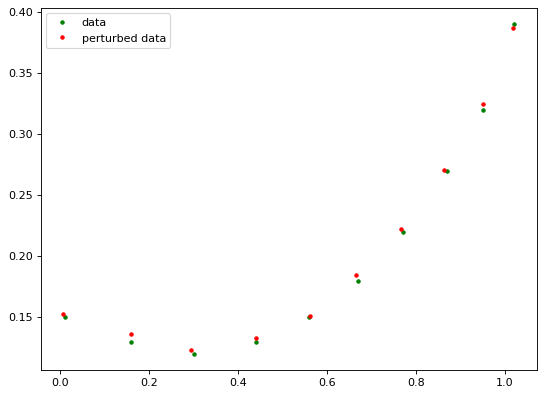

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data_df['x'].values,data_df['y'].values, 'g.', label='data_df')
plt.plot(perturbed_df['x'].values,perturbed_df['y'].values, 'r.', label='perturbed_df')
plt.legend()
plt.show()

In [ ]:
# Step 7: Fit perturbed data
pA_x = perturbed_df['x'].values.reshape(-1,1)
pA_y = perturbed_df['y'].values.reshape(-1,1)
pA_xy = pA_x * pA_y
pA_y2 = pA_y**2
pA_x2 = pA_x**5
pA = np.hstack((pA_x, pA_y, pA_xy, pA_y2, np.ones((pA_x.shape[0],1))))

py_pred = pA @ theta
py_real = pA_x2
pmse = np.mean((py_pred - py_real)**2)
print("MSE (perturbed data):", pmse)

0.009320856044738528


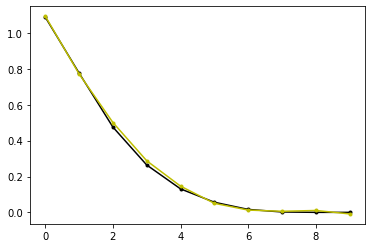

In [ ]:
pt = [ i for i in range(py_real.shape[0])]
plt.plot(pt,py_real,'k.-')
plt.plot(pt,py_pred,'y.-')
plt.show()

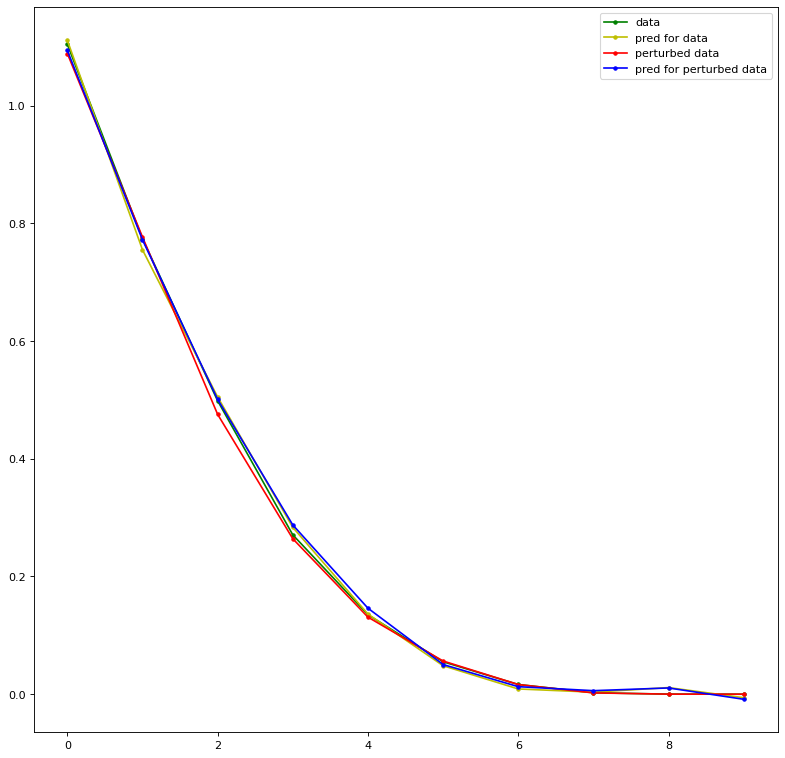

In [ ]:
# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_real, 'g.-', label='True Orbit (Original)')
plt.plot(y_pred, 'y.-', label='Fitted Orbit (Original)')
plt.plot(py_real, 'r.-', label='True Orbit (Perturbed)')
plt.plot(py_pred, 'b.-', label='Fitted Orbit (Perturbed)')
plt.title("Orbit Fitting: Original vs Perturbed Data")
plt.legend()
plt.show()

# HW12: Image Reconstruction under Low Light

**Objective:**  
Reconstruct a regular image from low-light versions captured with different color filters (red, green, blue). Use least squares regression to approximate the original image from noisy inputs and evaluate reconstruction quality.

**Steps:**  
1. Load regular and low-light images.  
2. Reshape images into pixel vectors for regression.  
3. Construct feature matrix from low-light channels.  
4. Solve least squares regression for each color channel.  
5. Reconstruct the regular image.  
6. Compute reconstruction error (MSE).  
7. Test reconstruction on a second dataset (bears images).  
8. Visualize original vs reconstructed images.  

**Interpretive Notes:**  
- Low-light images capture partial information (filtered by color).  
- Regression combines these signals to approximate the full-color image.  
- Reconstruction quality depends on noise level and filter accuracy.  
- Comparing datasets shows generalization of learned coefficients.

---

## Comparative Insight: Low-Light Reconstruction vs SVD Compression
- **Low-Light Reconstruction (HW12)**:
  - Uses regression to combine partial signals from filtered images.
  - Sensitive to noise, but can recover full-color image.
  - Demonstrates robustness of linear models in image restoration.
- **SVD Compression (HW2/HW12 extension)**:
  - Uses matrix factorization to approximate images with fewer components.
  - Focuses on dimensionality reduction and compression.
  - Reconstruction quality depends on rank selection.

**Key Takeaway**:  
Low-light reconstruction highlights how regression can recover missing information, while SVD shows how compression can preserve essential structure. Together, they illustrate two complementary approaches to image restoration and representation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import scipy.linalg as la

# Step 1: Load images
regular = imageio.imread("/content/regular.png")
green = imageio.imread("/content/low1.png")
blue = imageio.imread("/content/low2.png")
red = imageio.imread("/content/low3.png")

plt.figure()
plt.title('regular')
plt.imshow(regular)
plt.figure()
plt.title('green')
plt.imshow(green)
plt.figure()
plt.title('blue')
plt.imshow(blue)
plt.figure()
plt.title('red')
plt.imshow(red)

In [ ]:
# Step 2: Reshape into pixel vectors
pA = regular.reshape(-1, 1, 3)
pB = red.reshape(-1, 1, 3)
pC = green.reshape(-1, 1, 3)
pD = blue.reshape(-1, 1, 3)

# Step 3: Construct feature matrix
A_a1, A_a2, A_a3 = pA[:,:,0], pA[:,:,1], pA[:,:,2]
A_b1, A_b2, A_b3 = pB[:,:,0], pB[:,:,1], pB[:,:,2]
A_c1, A_c2, A_c3 = pC[:,:,0], pC[:,:,1], pC[:,:,2]
A_d1, A_d2, A_d3 = pD[:,:,0], pD[:,:,1], pD[:,:,2]

A = np.hstack((A_b1, A_b2, A_b3,
               A_c1, A_c2, A_c3,
               A_d1, A_d2, A_d3,
               np.ones((A_a1.shape[0],1))))

print(A.shape)

(120000, 10)


In [ ]:
# Step 4: Solve least squares regression
B = A.T @ A
y1_, y2_, y3_ = A.T @ A_a1, A.T @ A_a2, A.T @ A_a3
theta1, theta2, theta3 = la.pinv(B) @ y1_, la.pinv(B) @ y2_, la.pinv(B) @ y3_
print(theta1, theta2, theta3)

[[ 0.60008372]
 [-0.83676669]
 [-2.30778801]
 [ 1.98194378]
 [ 0.93751476]
 [-1.49131774]
 [-0.31465748]
 [ 0.18149806]
 [ 0.32879883]
 [15.85259375]] [[-0.35171075]
 [ 0.04388672]
 [-1.50469715]
 [ 1.20186615]
 [ 2.04424222]
 [-2.0169704 ]
 [-0.47451353]
 [ 0.55429676]
 [ 0.30397059]
 [11.80738096]] [[-0.38399305]
 [-0.43968442]
 [ 1.00330556]
 [ 0.86871427]
 [-0.27394525]
 [-0.67605163]
 [-0.13004278]
 [ 0.4885107 ]
 [ 1.02908663]
 [-1.60065862]]


In [ ]:
FB = np.hstack((theta1[0:3].reshape(1,3),theta2[0:3].reshape(1,3),theta3[0:3].reshape(1,3)))
FC = np.hstack((theta1[3:6].reshape(1,3),theta2[3:6].reshape(1,3),theta3[3:6].reshape(1,3)))
FD = np.hstack((theta1[6:9].reshape(1,3),theta2[6:9].reshape(1,3),theta3[6:9].reshape(1,3)))
p_const = np.hstack((theta1[9:10],theta2[9:10],theta3[9:10]))
print('FB',FB.reshape(3,3))
print('FC',FC.reshape(3,3))
print('FD',FD.reshape(3,3))
print('p_const',p_const.reshape(3,1))

FB [[ 0.60008372 -0.83676669 -2.30778801]
 [-0.35171075  0.04388672 -1.50469715]
 [-0.38399305 -0.43968442  1.00330556]]
FC [[ 1.98194378  0.93751476 -1.49131774]
 [ 1.20186615  2.04424222 -2.0169704 ]
 [ 0.86871427 -0.27394525 -0.67605163]]
FD [[-0.31465748  0.18149806  0.32879883]
 [-0.47451353  0.55429676  0.30397059]
 [-0.13004278  0.4885107   1.02908663]]
p_const [[15.85259375]
 [11.80738096]
 [-1.60065862]]


In [ ]:
# Step 5: Reconstruct regular image
y1_pred, y2_pred, y3_pred = A @ theta1, A @ theta2, A @ theta3
y_regular_pred = np.hstack((y1_pred, y2_pred, y3_pred)).reshape(pA.shape)
y_reconstruct = y_regular_pred.reshape(regular.shape) / 255

# Step 6: Compute error
mse = np.mean((y_regular_pred - pA)**2)
print("Reconstruction MSE (objects):", mse)

# Test: all pixels are 1
A_ones = np.ones(A.shape)
y1_pred_ones, y2_pred_ones, y3_pred_ones = A_ones @ theta1, A_ones @ theta2, A_ones @ theta3
y_regular_pred_ones = np.hstack((y1_pred_ones,y2_pred_ones,y3_pred_ones)).reshape(pA.shape)
y_reconstruct_ones = y_regular_pred_ones.reshape(regular.shape) / 255
mse_ones = np.mean((y_regular_pred_ones - pA)**2)
print("Reconstruction MSE (objects) - ones:", mse_ones)

9.368705003873524
114.31784998493296


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


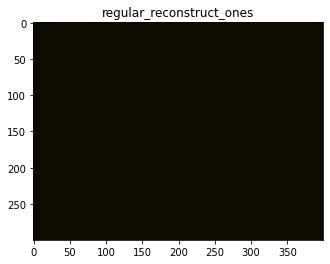

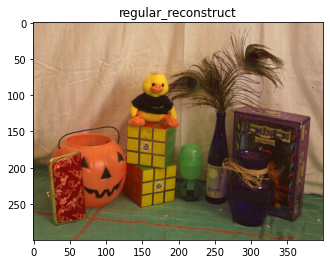

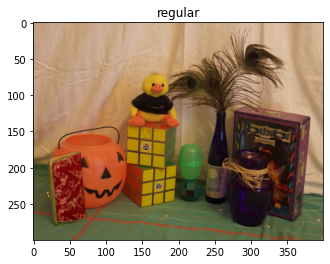

In [ ]:
plt.figure()
plt.title('regular_reconstruct_ones')
plt.imshow(y_reconstruct_ones)

plt.figure()
plt.title('regular_reconstruct')
plt.imshow(y_reconstruct)

plt.figure()
plt.title('regular')
plt.imshow(regular_objects)

In [ ]:
# Step 7: Test on bears dataset
regular_bears = imageio.imread("/content/regularbears.png")
green_bears = imageio.imread("/content/low1bears.png")
blue_bears = imageio.imread("/content/low2bears.png")
red_bears = imageio.imread("/content/low3bears.png")

pA_bears = regular_bears.reshape(-1, 1, 3)
pB_bears = red_bears.reshape(-1, 1, 3)
pC_bears = green_bears.reshape(-1, 1, 3)
pD_bears = blue_bears.reshape(-1, 1, 3)

A_bears = np.hstack((pB_bears[:,:,0], pB_bears[:,:,1], pB_bears[:,:,2],
                     pC_bears[:,:,0], pC_bears[:,:,1], pC_bears[:,:,2],
                     pD_bears[:,:,0], pD_bears[:,:,1], pD_bears[:,:,2],
                     np.ones((pA_bears.shape[0],1))))

(120000, 10)


In [ ]:
# Bears:
y1_pred_bears, y2_pred_bears, y3_pred_bears = A_bears @ theta1, A_bears @ theta2, A_bears @ theta3
y_regular_pred_bears = np.hstack((y1_pred_bears, y2_pred_bears, y3_pred_bears)).reshape(pA_bears.shape)
y_reconstruct_bears = y_regular_pred_bears.reshape(regular_bears.shape) / 255

mse_bears = np.mean((y_regular_pred_bears - pA_bears)**2)
print("Reconstruction MSE (bears):", mse_bears)

# Test: all pixels are 1
A_ones_bears = np.ones(A_bears.shape)
y1_pred_ones_bears, y2_pred_ones_bears, y3_pred_ones_bears = A_ones_bears @ theta1, A_ones_bears @ theta2, A_ones_bears @ theta3
y_regular_pred_ones_bears = np.hstack((y1_pred_ones_bears,y2_pred_ones_bears,y3_pred_ones_bears)).reshape(pA_bears.shape)
y_reconstruct_bears_ones = y_regular_pred_ones_bears.reshape(regular_bears.shape) / 255

mse_bears = np.mean((y_regular_pred_bears - pA_bears)**2)
print("Reconstruction MSE (bears):", mse_bears)

10.818925127412319
114.31784998493296


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


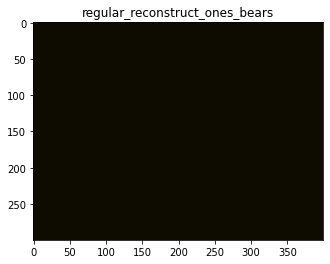

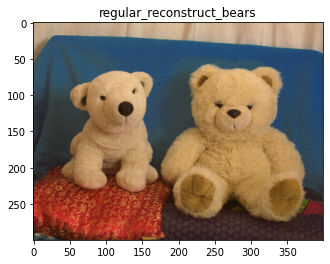

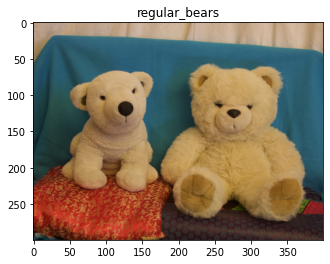

In [ ]:
plt.figure()
plt.title('regular_reconstruct_ones_bears')
plt.imshow(y_reconstruct_ones_bears)

plt.figure()
plt.title('regular_reconstruct_bears')
plt.imshow(y_reconstruct_bears)

plt.figure()
plt.title('regular_bears')
plt.imshow(regular_bears)

In [ ]:
# Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(regular)
plt.title("Original Objects")

plt.subplot(1, 3, 2)
plt.imshow(y_reconstruct)
plt.title("Reconstructed Objects")

plt.subplot(1, 3, 3)
plt.imshow(regular_bears)
plt.title("Original Bears")

plt.figure(figsize=(6, 6))
plt.imshow(y_reconstruct_bears)
plt.title("Reconstructed Bears")
plt.show()

# HW13: Going Down the Hill (Optimization)

**Objective:**  
Apply optimization methods (Nelder–Mead and Gradient Descent) to the Rosenbrock function with noise. Visualize convergence paths and compare numerical vs closed-form gradients.

**Rosenbrock Function:**  


$$
R(x, y) = (1 - x)^2 + 100 \cdot (y - x^2)^2
$$



**Steps:**  
1. Define Rosenbrock function and noisy variant.  
2. Implement Nelder–Mead optimization.  
3. Visualize contour plot and optimization path.  
4. Apply gradient descent with numerical gradient.  
5. Apply gradient descent with closed-form gradient.  
6. Compare convergence behavior.  

**Interpretive Notes:**  
- Nelder–Mead is a derivative-free optimization method, robust to noise.  
- Gradient descent requires gradient information; numerical approximation vs closed-form can differ in efficiency.  
- Rosenbrock’s narrow valley makes optimization challenging, highlighting differences between methods.

---

## Comparative Insight: Nelder–Mead vs Gradient Descent (HW13)
- **Nelder–Mead (Simplex Method)**:
  - **Nature**: Derivative-free optimization.
  - **Strengths**: Robust to noise, does not require gradient information.
  - **Use Case**: Useful when gradients are unavailable or unreliable (e.g., noisy functions).
  - **Limitation**: Can be slower in high dimensions, may converge to local minima.
- **Gradient Descent (Numerical Gradient)**:
  - **Nature**: Uses numerical approximation of gradients.
  - **Strengths**: Applicable when closed-form gradients are hard to derive.
  - **Use Case**: Flexible, but computationally expensive due to repeated evaluations.
  - **Limitation**: Sensitive to step size; numerical gradients can be noisy.
- **Gradient Descent (Closed-Form Gradient)**:
  - **Nature**: Uses exact analytical gradients.
  - **Strengths**: More efficient and accurate than numerical approximation.
  - **Use Case**: Preferred when gradients are known and tractable.
  - **Limitation**: Requires derivation of gradient expressions, which may be complex for some functions.

**Key Takeaway**  
- **Nelder–Mead** is a **robust**, **derivative-free method**, ideal for noisy or black-box functions.
- **Gradient Descent (numerical)** is a **fallback method** when gradients are unknown, but less efficient.
- **Gradient Descent (closed-form)** is the **most efficient** when gradients are available, converging faster and more reliably.

Together, HW13 illustrates the trade-offs between **robustness vs efficiency** in optimization methods.

In [ ]:
# 1. Imports and Function Definitions
import copy
import math
import numpy as np
import matplotlib.pyplot as plt

best_points_for_plot = []

# Rosenbrock function and noisy variant
a, b = 1, 100
R = lambda x, y: (a - x)**2 + b * (y - x**2)**2
noisy_R = lambda p: R(p[0], p[1]) + np.random.normal(0, 0.001 * R(p[0], p[1]))

In [ ]:
# 2. Nelder–Mead Implementation
def nelder_mead(f, x_start,
                step=0.1, no_improve_thr=1e-10,
                no_improv_break=10, max_iter=0,
                alpha=1., gamma=2., rho=0.5, sigma=0.5):
    func_calls = 1
    dim = len(x_start)
    prev_best = f(x_start)
    no_improv = 0
    res = [[x_start, prev_best]]

    # Initialize simplex
    for i in range(dim):
        x = copy.deepcopy(x_start)
        x[i] += step
        score = f(x)
        res.append([x, score])
        func_calls += 1

    iters = 0
    while True:
        res.sort(key=lambda x: x[1])
        best, best_point = res[0][1], res[0][0]

        if max_iter and iters >= max_iter:
            return res[0]
        iters += 1

        print(f"step: {iters}, f call: {func_calls}, best value: {best}, best point: {best_point}")
        best_points_for_plot.append(best_point)

        if best < prev_best - no_improve_thr:
            no_improv = 0
            prev_best = best
        else:
            no_improv += 1

        if no_improv >= no_improv_break:
            return res[0]

        # Centroid
        x0 = np.mean([tup[0] for tup in res[:-1]], axis=0)

        # Reflection
        xr = x0 + alpha * (x0 - res[-1][0])
        rscore = f(xr)
        func_calls += 1
        if res[0][1] <= rscore < res[-2][1]:
            res[-1] = [xr, rscore]
            continue

        # Expansion
        if rscore < res[0][1]:
            xe = x0 + gamma * (xr - x0)
            escore = f(xe)
            func_calls += 1
            res[-1] = [xe, escore] if escore < rscore else [xr, rscore]
            continue

        # Contraction
        xc = x0 + rho * (res[-1][0] - x0)
        cscore = f(xc)
        func_calls += 1
        if cscore < res[-1][1]:
            res[-1] = [xc, cscore]
            continue

        # Reduction
        x1 = res[0][0]
        res = [[x1 + sigma * (tup[0] - x1), f(x1 + sigma * (tup[0] - x1))] for tup in res]
        func_calls += len(res)

print("Final result:", nelder_mead(noisy_R, np.array([2., -1.])))

step: 1, f call: 3, best value: 2402.673707492028, best point: [ 2.  -0.9]
step: 2, f call: 5, best value: 1673.3789328600456, best point: [ 1.8  -0.85]
step: 3, f call: 7, best value: 1237.8809394864259, best point: [ 1.7   -0.625]
step: 4, f call: 9, best value: 390.1693268618199, best point: [ 1.25   -0.4125]
step: 5, f call: 11, best value: 28.88099762842125, best point: [0.825   0.14375]
step: 6, f call: 13, best value: 5.036763839545023, best point: [0.375   0.35625]
step: 7, f call: 15, best value: 5.036763839545023, best point: [0.375   0.35625]
step: 8, f call: 16, best value: 5.036763839545023, best point: [0.375   0.35625]
step: 9, f call: 18, best value: 0.23981240643429452, best point: [0.575   0.30625]
step: 10, f call: 20, best value: 0.23981240643429452, best point: [0.575   0.30625]
step: 11, f call: 21, best value: 0.23981240643429452, best point: [0.575   0.30625]
step: 12, f call: 23, best value: 0.23981240643429452, best point: [0.575   0.30625]
step: 13, f call: 2

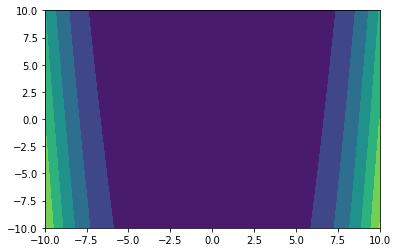

In [ ]:
# 3. Contour Plot of Noisy Rosenbrock
N = 1000
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
xx, yy = np.meshgrid(x, y, sparse=True)
z = noisy_R([xx, yy])

plt.contourf(x, y, z)
plt.title("Noisy Rosenbrock Function")
plt.show()

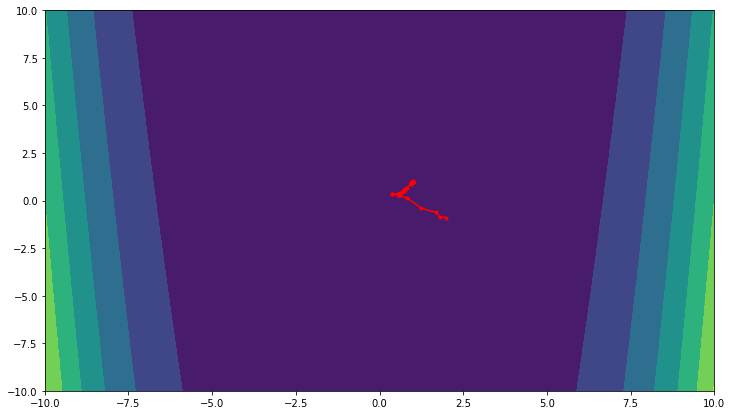

In [ ]:
# 4. Nelder–Mead Path Visualization
best_points_for_plot = np.array(best_points_for_plot)
plt.figure(figsize=(12, 7))
plt.contourf(x, y, z)
plt.plot(best_points_for_plot[:,0], best_points_for_plot[:,1], 'r.-', label="Nelder-Mead Path")
plt.legend()
plt.show()

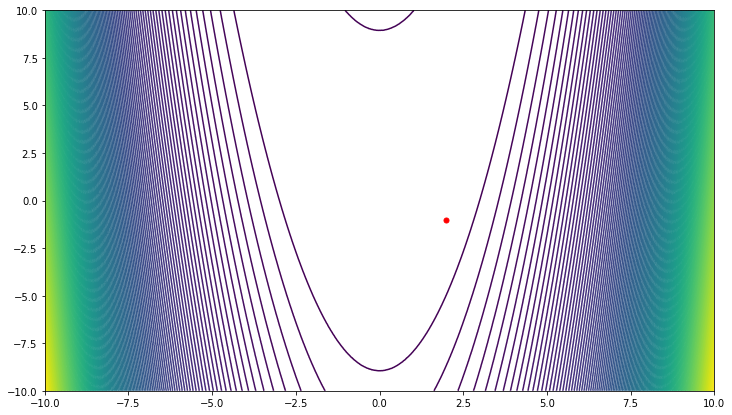

In [ ]:
lr = 0.0001
x_old = np.array([2, -1])

# Initialize figure
plt.figure(figsize=(12, 7))
plt.contour(x,y,z,200)
plt.plot([x_old[0]],[x_old[1]],marker='o',markersize=5, color ='r')

steps: 10000, lr: 4.76837158203125e-11, (x,y): (0.2874951148034098,0.07957471699824842)


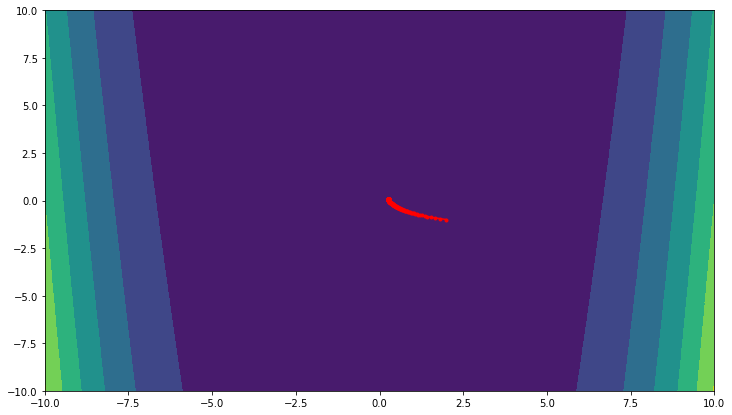

In [ ]:
# 5. Gradient Descent with Numerical Gradient
#!pip install numdifftools

import numdifftools as nd

path = [x_old]

for i in range(100000):
    if i % 500 == 0:
        lr /= 2
    x_new = x_old - lr * nd.Gradient(noisy_R)(x_old)
    path.append(x_new)
    x_old = x_new.copy()
    if np.sum(np.abs(path[-1] - path[-2])) < 1e-10:
        break

path = np.array(path)
print(f"steps: {i}, lr: {lr}, (x,y): ({path[-1,0]}, {path[-1,1]})")

plt.figure(figsize=(12, 7))
plt.contourf(x, y, z)
plt.plot(path[:,0], path[:,1], 'r.-', label="Numerical Gradient Descent Path")
plt.legend()
plt.show()

steps: 10000, lr: 4.76837158203125e-11, (x,y): (0.2878599801833767,0.07978726237198946)


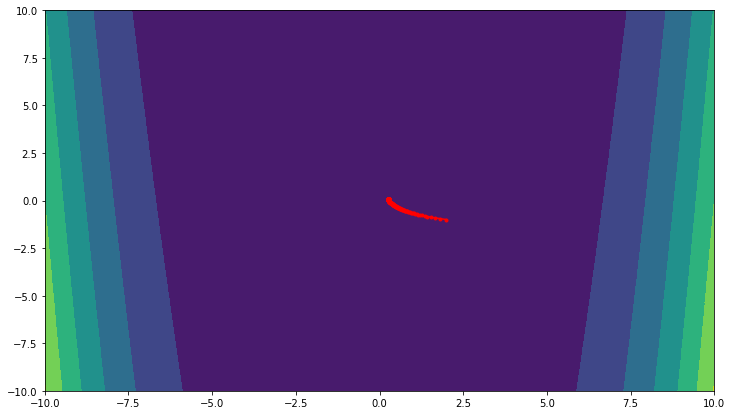

In [ ]:
# 6. Gradient Descent with Closed-Form Gradient
def grad_closed_form(x, a=1., b=100.):
    return np.array([2*(x[0]-a) - 4*b*x[0]*(x[1] - x[0]**2),
                     2*b*(x[1] - x[0]**2)])

path = [x_old]
for i in range(100000):
    if i % 500 == 0:
        lr /= 2
    x_new = x_old - lr * grad_closed_form(x_old)
    path.append(x_new)
    x_old = x_new.copy()
    if np.sum(np.abs(path[-1] - path[-2])) < 1e-10:
        break

path = np.array(path)
print(f"steps: {i}, lr: {lr}, (x,y): ({path[-1,0]}, {path[-1,1]})")

plt.figure(figsize=(12, 7))
plt.contourf(x, y, z)
plt.plot(path[:,0], path[:,1], 'r.-', label="Closed-Form Gradient Descent Path")
plt.legend()
plt.show()

# HW14: Going Down the Hill-2 (Quadratic Optimization)

**Objective:**  
Apply different optimization methods (coordinate descent, conjugate gradient, closed-form gradient descent) to minimize the quadratic function:



$$
M(x, y) = 0.26(x^2 + y^2) - 0.48xy
$$



**Steps:**  
1. Define the quadratic function and visualize contours.  
2. Implement coordinate descent.  
3. Implement matrix-based conjugate gradient.  
4. Implement gradient descent with closed-form gradient.  
5. Implement Fletcher–Reeves conjugate gradient with backtracking line search.  
6. Visualize optimization paths.  

**Interpretive Notes:**  
- Quadratic functions are convex, making them ideal for testing optimization algorithms.  
- Coordinate descent updates one variable at a time.  
- Conjugate gradient methods exploit quadratic structure for faster convergence.  
- Fletcher–Reeves and Polak–Ribiere are variants of conjugate gradient with different update rules.  

---

## Comparative Insight: HW14 Optimization Methods
- **Coordinate Descent**:
  - Updates one variable at a time while holding the other fixed.
  - **Strengths**: Simple to implement, intuitive.
  - **Limitations**: Slow when variables are strongly correlated; convergence can zig‑zag in narrow valleys.
- **Matrix Conjugate Gradient**:
  - Exploits the quadratic structure of the problem using linear algebra.
  - **Strengths**: Fast convergence for symmetric positive‑definite systems; efficient for large problems.
  - **Limitations**: Requires matrix operations; less robust if the system is ill‑conditioned.
- **Closed‑Form Gradient Descent**:
  - Uses exact gradient and Hessian information for updates.
  - **Strengths**: Precise and efficient when analytical derivatives are available.
  - **Limitations**: Deriving gradients can be complex for non‑quadratic functions; sensitive to step size.
- **Fletcher–Reeves Conjugate Gradient (with line search)**:
  - Iteratively builds conjugate directions using gradient information.
  - **Strengths**: Faster convergence than plain gradient descent; avoids zig‑zagging.
  - **Limitations**: Requires careful line search; performance depends on update rule (F‑R vs PRP).

**Key Takeaway**
HW14 illustrates the **spectrum of optimization strategies**:
- **Coordinate descent** is the most basic, intuitive approach.
- **Matrix conjugate gradient** leverages structure for speed.
- **Closed‑form gradient descent** is efficient when derivatives are known.
- **Fletcher–Reeves** shows how conjugate gradient methods refine descent directions for faster convergence.  

Together, they highlight the trade‑offs between **simplicity**, **robustness**, and **efficiency** in optimization.

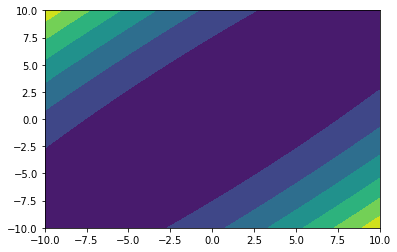

In [ ]:
# 1. Define Function and Contour Plot
import numpy as np
import matplotlib.pyplot as plt

M = lambda x, y: 0.26*(x**2 + y**2) - 0.48*x*y

N = 1000
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
xx, yy = np.meshgrid(x, y, sparse=True)
z = M(xx, yy)

plt.contourf(x, y, z)
plt.title("Quadratic Function Contour")
plt.show()

start from  0.9762700785464951 4.30378732744839
iter: 89, (x,y): [2.5788957237843998e-06, 2.3805191296471384e-06], func: 2.557962751597481e-13


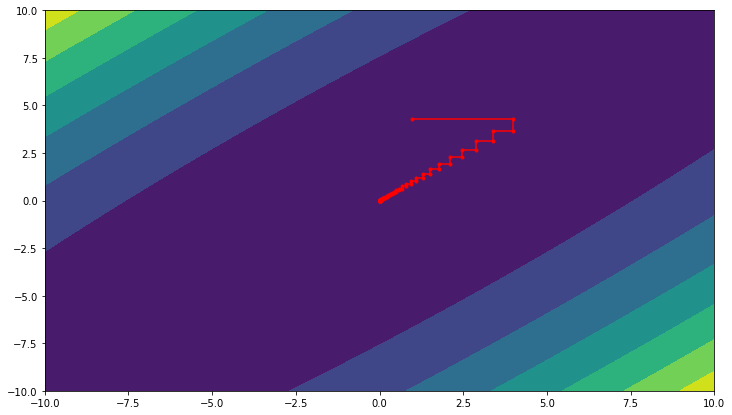

In [ ]:
# 2. Coordinate Descent
np.random.seed(0)
x_old, y_old = np.random.random()*20-10, np.random.random()*20-10
print("Start from:", x_old, y_old)

path = [[x_old, y_old]]
for i in range(1000):
    x_new = 12*y_old/13
    path.append([x_new, y_old])
    x_old = x_new

    y_new = 12*x_old/13
    path.append([x_old, y_new])
    y_old = y_new

    diff = np.abs(path[-1][0]-path[-3][0]) + np.abs(path[-1][1]-path[-3][1])
    if diff < 1e-6:
        print(f"iter: {i}, (x,y): {path[-1]}, func: {M(path[-1][0], path[-1][1])}")
        break

path = np.array(path)
plt.figure(figsize=(12, 7))
plt.contourf(x, y, z)
plt.plot(path[:,0], path[:,1], 'r.-', label="Coordinate Descent Path")
plt.legend()
plt.show()

start from  [0.97627008 4.30378733]
iter: 0, (x,y): [0. 0.], func: 0.0


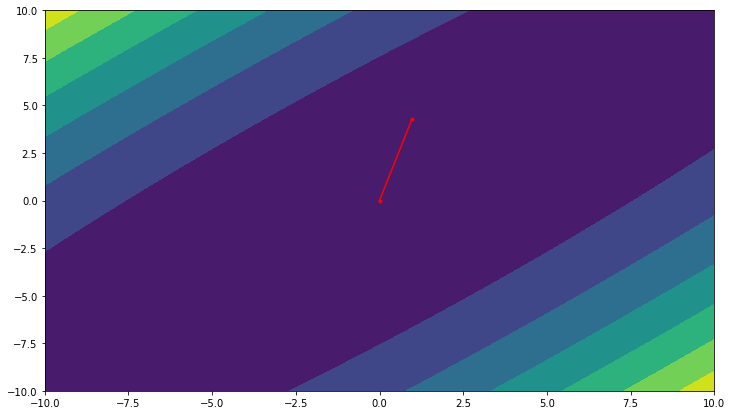

In [ ]:
# 3. Matrix-Based Conjugate Gradient
np.random.seed(0)
x_old = np.array([np.random.random()*20-10, np.random.random()*20-10])
print("Start from:", x_old)

A = np.array([[12/13, 0],
              [0, 12/13]])
b = np.array([0, 0])

path = [x_old]
r = b - A.dot(x_old)
p = r.copy()

for i in range(10000):
    Ap = A.dot(p)
    alpha = np.dot(p, r) / np.dot(p, Ap)
    x_old = x_old + alpha*p
    path.append(x_old)
    r = b - A.dot(x_old)

    if np.linalg.norm(r) < 1e-8:
        print(f"iter: {i}, (x,y): {x_old}, func: {M(x_old[0], x_old[1])}")
        break
    else:
        beta = -np.dot(r, Ap) / np.dot(p, Ap)
        p = r + beta*p

path = np.array(path)
plt.figure(figsize=(12, 7))
plt.contourf(x, y, z)
plt.plot(path[:,0], path[:,1], 'r.-', label="Matrix Conjugate Gradient Path")
plt.legend()
plt.show()

In [ ]:
# 4. Gradient Descent with Closed-Form Gradient
def grad_closed_form(x):
    return np.array([12*x[1]/13, 12*x[0]/13])

import copy
np.random.seed(0)
x_old = np.array([np.random.random()*20-10, np.random.random()*20-10])
print("Start from:", x_old)

path = [x_old]
S_old = -grad_closed_form(x_old)

for i in range(10000):
    H = np.array([[0.52, -0.48], [-0.48, 0.52]])
    lambda_p = -(grad_closed_form(x_old).T @ S_old) / (S_old.T @ H @ S_old)
    x_new = x_old + lambda_p*S_old
    omega_p = (grad_closed_form(x_new).T @ H @ S_old) / (S_old.T @ H @ S_old)
    S_new = -grad_closed_form(x_new) + omega_p*S_old

    x_old, S_old = copy.deepcopy(x_new), copy.deepcopy(S_new)
    path.append(x_new)

    if np.linalg.norm(path[-1] - path[-2]) < 1e-8:
        print(f"iter: {i}, (x,y): {x_old}, func: {M(x_old[0], x_old[1])}")
        break

path = np.array(path)
plt.figure(figsize=(12, 7))
plt.contourf(x, y, z)
plt.plot(path[:,0], path[:,1], 'r.-', label="Closed-Form Gradient Descent Path")
plt.legend()
plt.show()

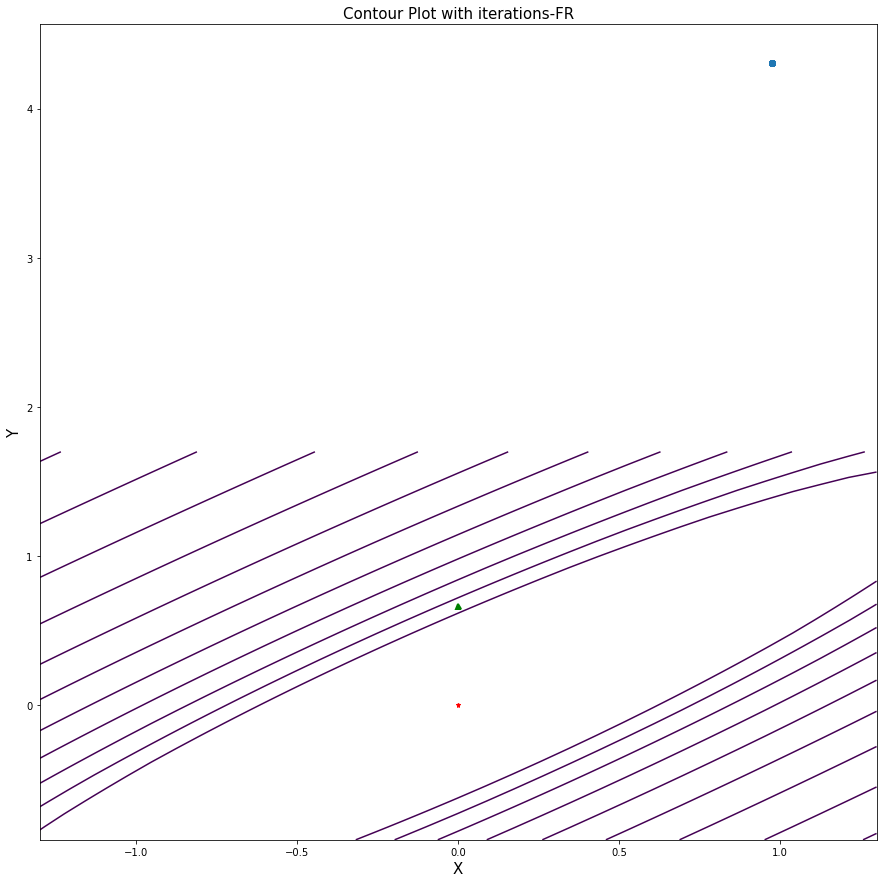

In [ ]:
# 5. Fletcher–Reeves Conjugate Gradient
def bls(func, der_func, x, p, rho, alpha_bar=1, c=0.5):
    alpha = alpha_bar
    while func(x + alpha*p) > func(x) + c*alpha*np.dot(der_func(x).T, p):
        alpha *= rho
    return alpha

def conj_grad(x_init, f, hess_f, grad_f, precision=1e-8, iterations=2000, method="F-R"):
    old_x = x_init
    g0 = grad_f(old_x)
    d = np.zeros_like(g0)
    beta = 0
    iters = 0
    path = [old_x]

    while True:
        d = -g0 if iters == 2 else -g0 + beta*d
        alpha = bls(f, grad_f, old_x, d, rho=0.5, alpha_bar=1)
        new_x = old_x + alpha*d
        g1 = grad_f(new_x)

        if np.linalg.norm(g1) < precision or iters > iterations:
            break

        beta = np.dot(g1.T, g1)/np.linalg.norm(g0)**2 if method == "F-R" else np.dot(g1.T, (g1-g0))/np.linalg.norm(g0)**2
        old_x, g0 = copy.copy(new_x), copy.copy(g1)
        path.append(old_x)
        iters += 1

    return np.array(path)

def func_M(x): return 0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]
def der_M(x): return np.array([12*x[1]/13, 12*x[0]/13])
def hes_M(x): return np.array([[0.52, -0.48], [-0.48, 0.52]])

np.random.seed(0)
x_init = np.array([np.random.random()*20-10, np.random.random()*20-10])
fr_path = conj_grad(x_init, func_M, hes_M, der_M, method="F-R", precision=1e-8)

plt.figure(figsize=(12, 7))
X, Y = np.meshgrid(np.linspace(-1.3, 1.3, 31), np.linspace(-0.9, 1.7, 31))
Z = M(X, Y)
plt.contour(X, Y, Z, np.logspace(-1, 3, 31))
plt.plot(fr_path[:,0], fr_path[:,1], 'o-', label="Fletcher-Reeves Path")
plt.scatter([0], [0], c='red', marker='*', label="Global Minimum")
plt.title("Contour Plot with Fletcher-Reeves Iterations")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()